<a href="https://colab.research.google.com/github/Obreintelly/House_Pricing_Analysis/blob/main/Real_Estate_Pricing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Overview**

**a. Specifying the Question**

> An investigation of factors affecting housing prices on the following dataset  http://bit.ly/IndependentProjectWeek7Dataset and building of a model that predicts the sale price of houses given predictor variables.

**b. Defining the Success Metric**


> For this analysis, we will build the following models: Qunatile Rregression (QR); Ridge Regression, Lasso Regression and Elasticnet Regression. our metric for success would be the model with the highest performance measurement. That is, the lowest Root Median Square Error. 

**c. Understanding the Context**


> We are provided with the Real Estate Data from one of the Counties in the US and the World with the best data collection & analytical access process, King County- Washington. Various factors influence housing prices across the globe. For a tenant, the location of the house, size of the house, utilities in the house and condition would perhaps play a big role. 


> In this research, our dataset has many variables which we will be testing against price to deduce existing relationships. Knowing the features of a house, can we amke an accurate prediction of how much the sale price would be?

**d. Recording the Experimental Design**






**Data Report:** https://docs.google.com/document/d/17hRju7qoUKrU1KxeSuAJnp51YtRuXH2i/edit

# **2. Importing Relevant Libraries**

In [240]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')


#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

In [241]:
#Installing Geo Pandas
!pip install geopandas

In [242]:
#importing geography libraries

import geopandas as gpd

from shapely.geometry import Point, Polygon

# **3. Loading Our Dataset**

In [243]:
#Loading Our Dataset
df= pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

# **4. Previewing Our Dataset**

In [244]:
#Displaying our first 5 rows
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [245]:
#Displaying the last 5 rows
df.tail()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

In [246]:
#Ensuring Our Columns have the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [247]:
#Dataset Glossary
#Id 
#price  - Price of the house
#bedrooms - Number of Bedrooms
#bathrooms - Number of Bathrooms
#sqft_living - Square feet area of living area
#sqft_lot  - Square feet area of parking Layout
#floors - Number of Floors
#waterfront - Whether waterfront is there or not
#view - Number of Views
#grade - Grades
#sqft_above
#sqft_basement - Square feet area off basement
#yr_built - Year the house is built
#yr_renovated - Year the house is renovated
#zipcode - zipcode os the house
#lat : Latitude of the house
#lon : Longitude of the house
#sqft_living15
#sqft_lot15

In [248]:
#Checking the Size of Our Dataset
print('Our Dataset has: {} Rows, {} Columns'.format(*df.shape))


Our Dataset has: 21613 Rows, 20 Columns


In [249]:
#Checking for number of unique values in our dataset
df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [250]:
#Checking the bedrooms column
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [251]:
#checking bathrooms column
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [252]:
#Further checks on Floors to understand how many floors we have
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [253]:
#Further Checks on Waterfront to understand what its rows have
#We take it 1 means yes and o means No
df.waterfront.unique()

array([0, 1])

In [254]:
#Checks on Column view to ensure we have expected values
df.view.unique()

array([0, 3, 4, 2, 1])

In [255]:
#Checks to ensure we know what we have in the Condition rows
df.condition.unique()

array([3, 5, 4, 1, 2])

In [256]:
#From the unique values in our dataset, we have established that the following
#are categorical values: Bedrooms, bathrooms, floors, waterfront, view and  condition. 
#The rest are numerical

In [257]:
df.waterfront.unique()

array([0, 1])

In [258]:
df[df['waterfront']==1]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
49      822039084  1350000.0         3  ... -122.451           2680       72513
230    8096000060   655000.0         2  ... -122.375           2030       13193
246    2025069065  2400000.0         4  ... -122.072           3120       18841
264    2123039032   369900.0         1  ... -122.438           1230       14267
300    3225069065  3080000.0         4  ... -122.077           4550       19508
...           ...        ...       ...  ...      ...            ...         ...
19984  2025069140  1900000.0         3  ... -122.071           2830       38211
20325   518500480  3000000.0         3  ... -122.205           3550        5634
20767  8043700105  2300000.0         4  ... -122.104           2670        8525
21201   518500460  2230000.0         3  ... -122.205           3560        5762
21576  9253900271  3570000.0         5  ... -122.110           3470       18270

[163 rows x 20 columns]

# **5. Data Cleaning**

In this section, before embarking on data analysis, we will first ensure that our data complies with the following Data Science Principles:

1. Validity
2. Accuracy
3. Consistency
4. Completeness
5. Uniformity


# Validity/Accuracy

In [259]:
#Exploring our columns
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [260]:
#Checking Out Houses without bedrooms
df[df['bedrooms']==0]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
875    6306400140  1100000.0         0  ... -122.322           2360        4000
3119   3918400017   380000.0         0  ... -122.356           1470        1399
3467   1453602309   288000.0         0  ... -122.290           1430        1650
4868   6896300380   228000.0         0  ... -122.261           2170        6000
6994   2954400190  1300000.0         0  ... -122.069           4740       35061
8477   2569500210   339950.0         0  ... -122.151           2500        8751
8484   2310060040   240000.0         0  ... -122.053           1810        5685
9773   3374500520   355000.0         0  ... -122.168           2520        8050
9854   7849202190   235000.0         0  ... -121.828           1060        7200
12653  7849202299   320000.0         0  ... -121.826           1500        4675
14423  9543000205   139950.0         0  ... -122.250           1380        9600
18379  1222029077   265000.0         0  ... -122.491           1920      224341
19452  3980300371   142000.0         0  ... -121.888           1620       22850

[13 rows x 20 columns]

In [261]:
#It is highly unlikely that there will be any houses with no bedrooms being let
#We therefore drop all the Houses with zero bedrooms to ensure we have
#accurate data. The number of rows with this issue suggests that this may 
#be more of an anomaly than design

df = df.drop(df[(df.bedrooms == 0)].index)

In [262]:
df.shape

(21600, 20)

In [263]:
#Checking the Houses with 33 bedrooms
#Highly unlike to have a house with 33 berooms and 2 bedrooms but with just 1 floor
df[df['bedrooms']==33]

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
15870  2402100895  640000.0        33  ... -122.331           1330        4700

[1 rows x 20 columns]

In [264]:
#It is highly unlikely that a house will have 33 bedrooms, 1 floor but just
#1 bedroom. This might have been a data entry error. We thus proceed to 
#drop this entry.
df= df.drop(df[df['bedrooms']==33].index)

In [265]:
#Shape of our data
df.shape

(21599, 20)

In [266]:
#Checking Bathroom column to ensure we have the correct values
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 0.  , 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [267]:
#We validate our data with an external source to undertand whether the use of
#fractions for bathrooms is not an anormally. In the US, this is a common
#phenomenon in the real estate where the Utilities in a bathroom are counted. A
#bathroom with just shower and sink will be classified as half a bathroom.
#More can be accessed here: https://www.homelight.com/blog/buyer-what-is-a-half-bath/ 

In [268]:
#Checking building year column
df.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [269]:
#Our building data is from the year 1900 to 2015

In [270]:
#Checking year on renovation
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [271]:
#Year 0 will need further investigations

df[df['yr_renovated']==0]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520   221900.0         3  ... -122.257           1340        5650
2      5631500400   180000.0         2  ... -122.233           2720        8062
3      2487200875   604000.0         4  ... -122.393           1360        5000
4      1954400510   510000.0         3  ... -122.045           1800        7503
5      7237550310  1230000.0         4  ... -122.005           4760      101930
...           ...        ...       ...  ...      ...            ...         ...
21608   263000018   360000.0         3  ... -122.346           1530        1509
21609  6600060120   400000.0         4  ... -122.362           1830        7200
21610  1523300141   402101.0         2  ... -122.299           1020        2007
21611   291310100   400000.0         3  ... -122.069           1410        1287
21612  1523300157   325000.0         2  ... -122.299           1020        1357

[20685 rows x 20 columns]

In [272]:
#Zero must mean the house was never renovated

# Completeness

In [273]:
#Checking for any missing values

df.isna().any().sum()

0

# Consistency

In [274]:
#Checking for Duplicates

df.duplicated().any()

True

In [275]:
#Checking how many duplicates we have
df.duplicated().any().sum()

1

In [276]:
#We drop the duplicated row
df=df.drop_duplicates()

In [277]:
#CHecking to ensure we do not have anymore duplicates
df.duplicated().any()

False

# Dealing with Outliers in Our Dataset

In [278]:

#Checking for Outliers in Our Dataset


In [279]:
#plt.figure(figsize=(15,10))
#for i in range (len(df.columns)):
#  plt.subplot(3,5,i+1)
#  sns.boxplot(df[df.columns[i]]);

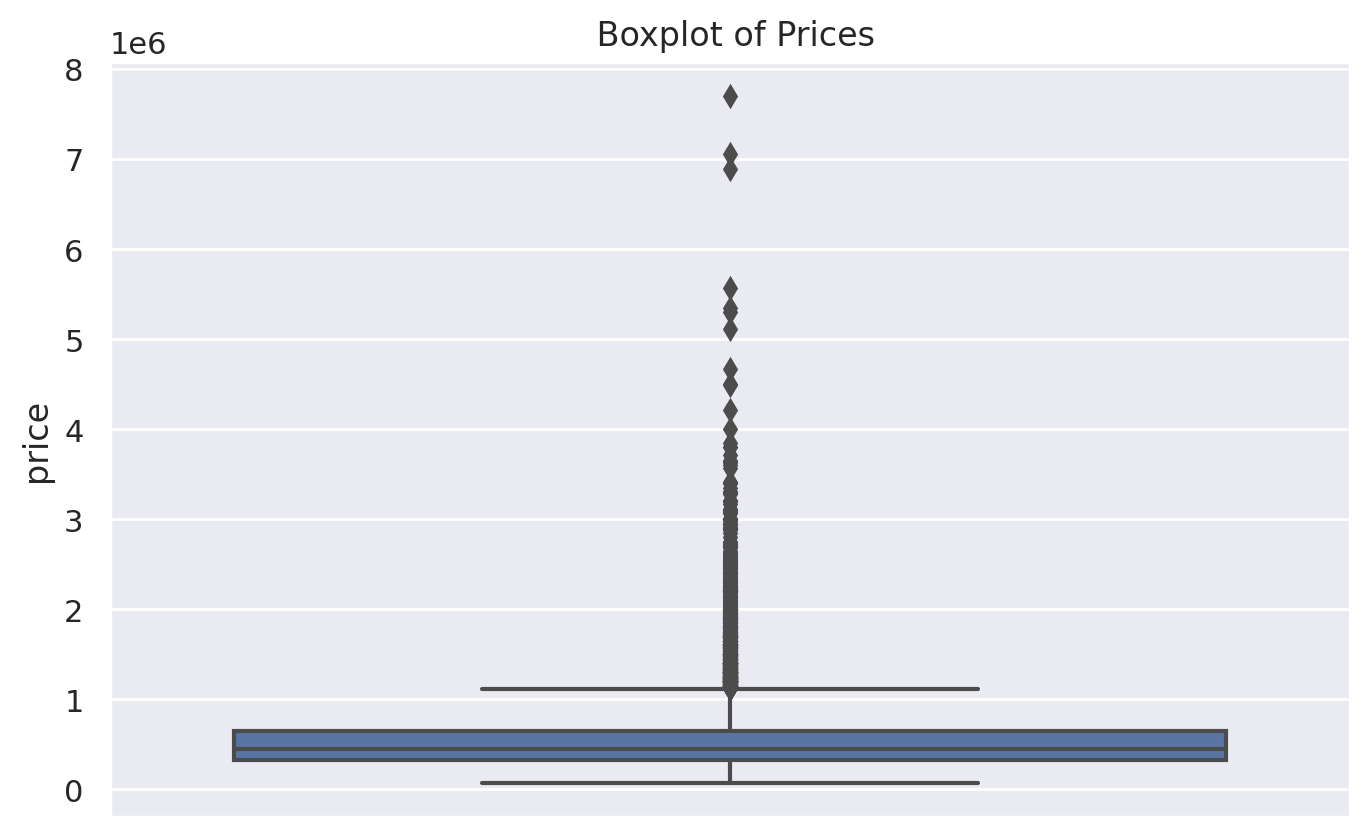

In [280]:
#Checking for Outliers in Our Dataset
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(data=df, y='price')
plt.title(' Boxplot of Prices');

In [281]:
#Since the price of a house is determined primarily by its size, i.e the number of
#bedrooms, we shall investigate the relationship between size and outliers in our dataset

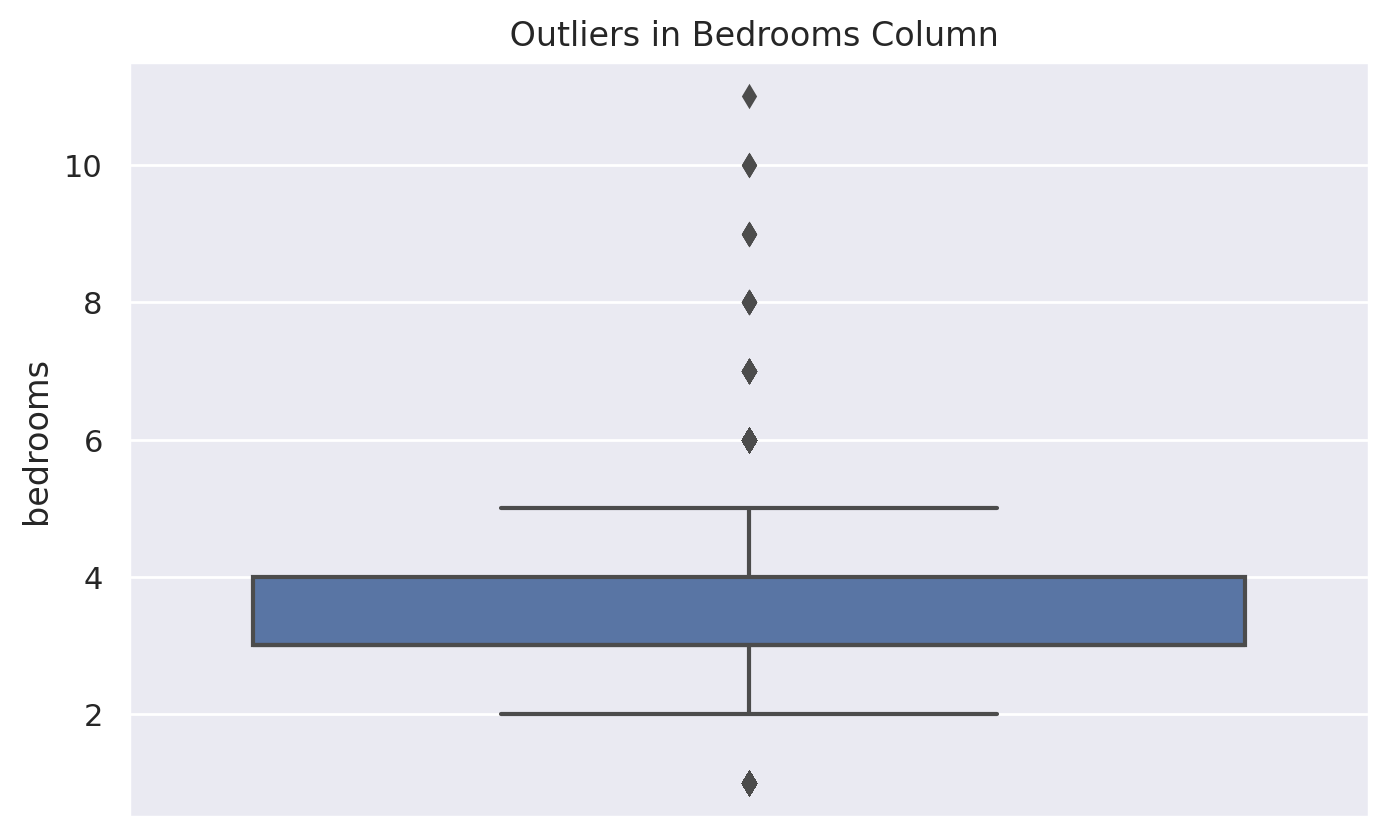

In [282]:
#Checking for Outliers in Our Dataset
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(data=df, y='bedrooms')
plt.title(' Outliers in Bedrooms Column');

In [283]:
#Clearly 5 bedrooms and above are outliers in our data. 
#We will investigate all the bedrooms above 5 and determine whether to
#include them in the dataset or not
#We have about 13 eight bedroomed houses
df[df['bedrooms']==8]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
1660   9126101740   490000.0         8  ... -122.303           1800        2580
4035    685000115  2150000.0         8  ... -122.202           2050        9100
4067   7226500100   373000.0         8  ... -122.205           1480        4942
6174   1873400020   340000.0         8  ... -122.331           1760        7624
9077   6746700615   700000.0         8  ... -122.316           1610        3000
9452   2769600590   900000.0         8  ... -122.363           1560        3737
10958  1652500060  1650000.0         8  ... -122.221           3670       20500
12885  8813400155   808000.0         8  ... -122.289           2170        3750
15070  7418000130   430000.0         8  ... -122.131           1780       10457
15670  8141200080   680000.0         8  ... -122.305           1540        4800
17235  1338600225  1970000.0         8  ... -122.303           4440        8640
18477  1346300150  3300000.0         8  ... -122.314           4210        8325
19302  3756900027   575000.0         8  ... -122.211           1380        8172

[13 rows x 20 columns]

In [284]:
#We only have one 11 bedroom house
df[df['bedrooms']==11]

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
8757  1773100755  520000.0        11  ... -122.363           1420        4960

[1 rows x 20 columns]

In [285]:
#We have 3 ten bedroom houses
df[df['bedrooms']==10]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
13314   627300145  1150000.0        10  ... -122.113           2730       10400
15161  5566100170   650000.0        10  ... -122.175           2040       11914
19254  8812401450   660000.0        10  ... -122.320           1810        3745

[3 rows x 20 columns]

In [286]:
#We have about 6 nine bedroom houses
df[df['bedrooms']==9]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
4096   1997200215   599999.0         9  ... -122.338           1460        6291
4235   2902200015   700000.0         9  ... -122.324           1960        2450
6079   9822700190  1280000.0         9  ... -122.289           2510        5000
8546    424049043   450000.0         9  ... -122.301           1448        3866
16844  8823900290  1400000.0         9  ... -122.309           2710        4320
18443  8823901445   934000.0         9  ... -122.307           2460        4400

[6 rows x 20 columns]

In [287]:
#We have around 272 six bedroomed houses
df[df['bedrooms']==6]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
209    6300000550   464000.0         6  ... -122.343           1560        1312
232    9264902050   315000.0         6  ... -122.339           2120        8236
239    5152100060   472000.0         6  ... -122.324           2600       13988
331    2946001550   279000.0         6  ... -122.323           1590        7955
486    9286000240  1070000.0         6  ... -122.137           3600       11793
...           ...        ...       ...  ...      ...            ...         ...
20984  2149800278   343000.0         6  ... -122.211           3078       69993
21085  4449800480   677790.0         6  ... -122.389           1440        3960
21186  7896300592   303500.0         6  ... -122.288           2040        7214
21375  6061500100  1170000.0         6  ... -122.155           4620       10217
21522   603000555   462500.0         6  ... -122.286           1680        5000

[272 rows x 20 columns]

In [288]:
#We have about 50 seven bedroom houses.
df[df['bedrooms']==7]

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
556    5486800070  1950000.0         7  ... -122.231           3230       20697
1135   4024100951   420000.0         7  ... -122.307           1850        8031
1241   7227802030   350000.0         7  ... -122.183           2150        7333
3721   5451100490   884900.0         7  ... -122.223           2310       10910
4024   9175600025   800000.0         7  ... -122.368           2810       33190
4717   2025049006   750000.0         7  ... -122.316           2510        4056
4760   4178300130   950000.0         7  ... -122.149           3040       13500
4867   5561300480   600000.0         7  ... -122.003           2460       38370
7023    686400380   770000.0         7  ... -122.115           2340        8145
7191   7159200005  3200000.0         7  ... -122.354           2940        5400
8120   4006000183   450000.0         7  ... -122.279           1880        6000
8516   3425059141   999000.0         7  ... -122.147           2390       12054
8629   2926049086   575000.0         7  ... -122.332           2030        9000
9132   1471700410   310000.0         7  ... -122.066           1710       15429
9659   1683400165   853800.0         7  ... -122.313           1970        4410
9732    263000324   550000.0         7  ... -122.349           1420        1560
10275  1420700030   597157.0         7  ... -122.168           1840       10836
10787  6411600370   475000.0         7  ... -122.327           1380        7555
12017   424069271   936000.0         7  ... -122.040           3350       10005
12605  2862100366   730000.0         7  ... -122.319           1240        4280
12608  3812400455   291000.0         7  ... -122.277           1500        7366
12765  7663700968   565000.0         7  ... -122.291           1440        1865
12777  1225069038  2280000.0         7  ... -121.986           4850      217800
13120  6453300306   419000.0         7  ... -122.338           1890        8951
14030  5316101075  2890000.0         7  ... -122.285           3050        7469
14201  6190701484   450000.0         7  ... -122.355           1570        8400
14915  9187200345   599000.0         7  ... -122.294           2280        5750
15022  2210500010  2450000.0         7  ... -122.227           3240       13912
15246  5536100005  2300000.0         7  ... -122.208           2920       10610
15521  3052700225   727160.0         7  ... -122.376           1360        1552
15751  6744700427   540000.0         7  ... -122.289           2510        7479
16313  2887950020   280000.0         7  ... -122.177           1710        5688
16736  2818600010  1190000.0         7  ... -122.392           2870        8342
17335  2856100381   580000.0         7  ... -122.390           1340        3825
18460  2616800600   840000.0         7  ... -122.033           2810       40510
18823  4040500100   539000.0         7  ... -122.134           2070        7910
18975  1778360150  1240000.0         7  ... -122.118           4470        8639
19327  2771604190   824000.0         7  ... -122.388           2010        4000

[38 rows x 20 columns]

In [289]:
#We will drop all houses with bedrooms greater than 6 from our dataset

df = df.drop(df[(df.bedrooms > 6)].index)

In [290]:
df.shape

(21535, 20)

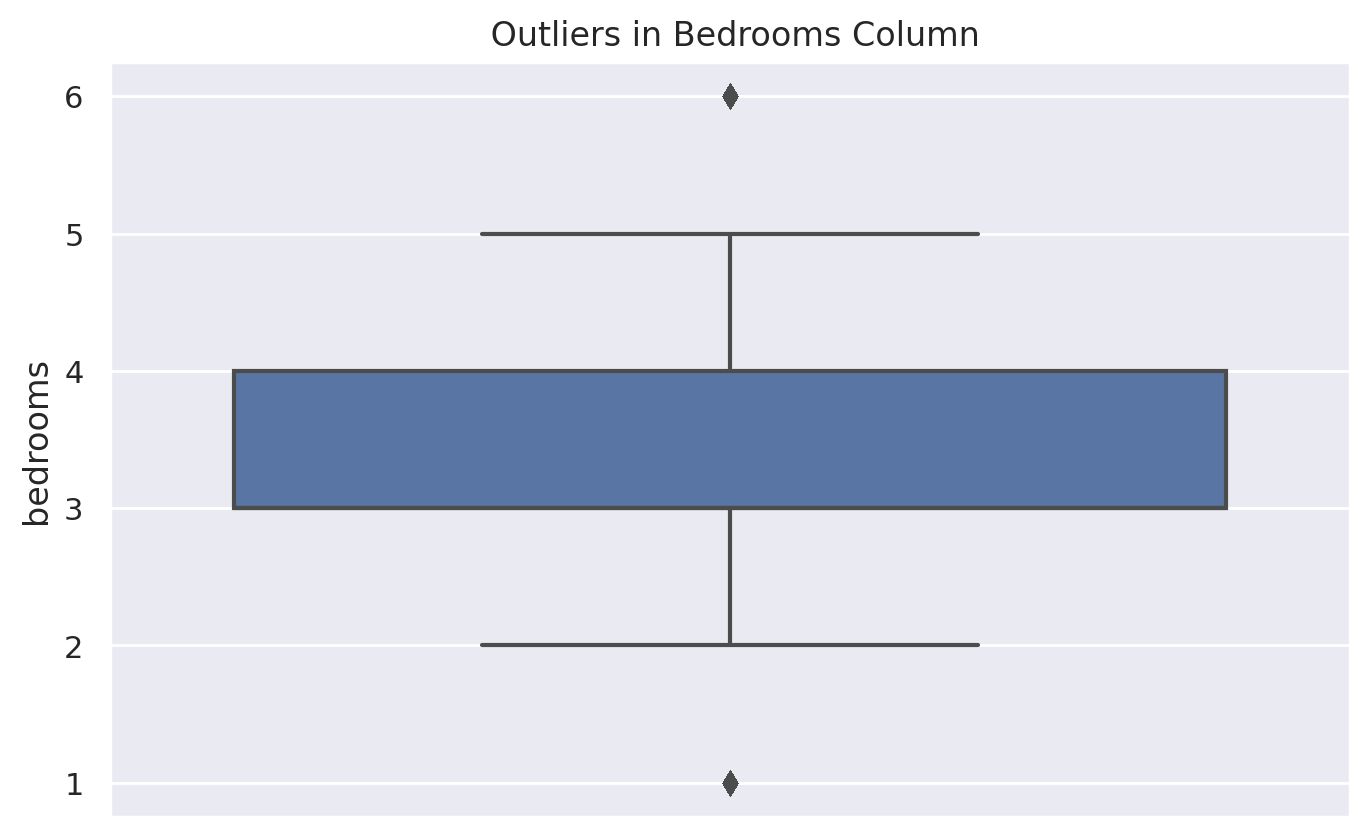

In [291]:
#Checking Our new Dataset
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(data=df, y='bedrooms')
plt.title(' Outliers in Bedrooms Column');

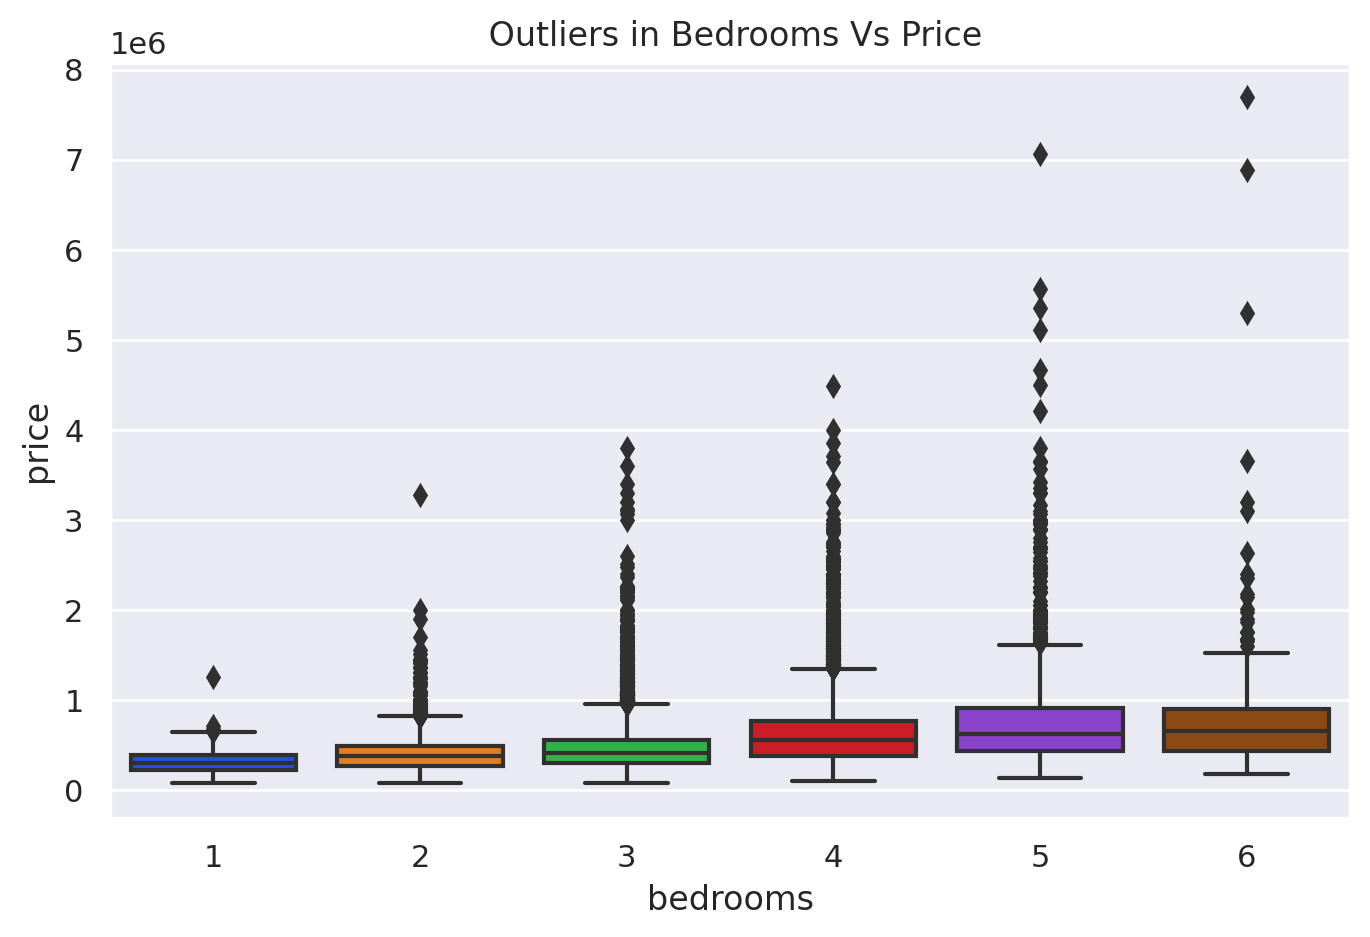

In [292]:
#Checking Our new Dataset
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(data=df, y='price', x='bedrooms', palette='bright')
plt.title(' Outliers in Bedrooms Vs Price');

In [293]:
#We still have Outliers in Our Dataset which we can address using
#Z-score approach
#from scipy import stats

#def find_outliers(df, threshold):
    
#    threshold_z_score = stats.norm.ppf(threshold)
    
#    z_score = pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns)
    
#    return (z_score > threshold_z_score). sum(axis=0)

In [294]:
#stats.norm.ppf(0.5)

In [295]:
#Remove Outliers
#def remove_outliers(df, threshold):
    
 #   threshold_z_score = stats.norm.ppf(threshold)
    
 #   z_score = pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns)
    
  #  z_score = (z_score > threshold_z_score)
    
    # get the indecies
    
   # outliers =  z_score.sum(axis=1)
    #outliers = outliers > 0
    #outliers_index = df.index[outliers]
    
    
  #df =df.drop(outliers_index, axis =0).reset_index(drop=True)
    
   # return df
    

In [296]:
#find_outliers(df, 0.9999)

In [297]:
#df.shape

In [298]:
#Removing the Outliers
#q1= df.quantile(0.25)
#q3= df.quantile(0.75)
#iqr= q3-q1
#df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

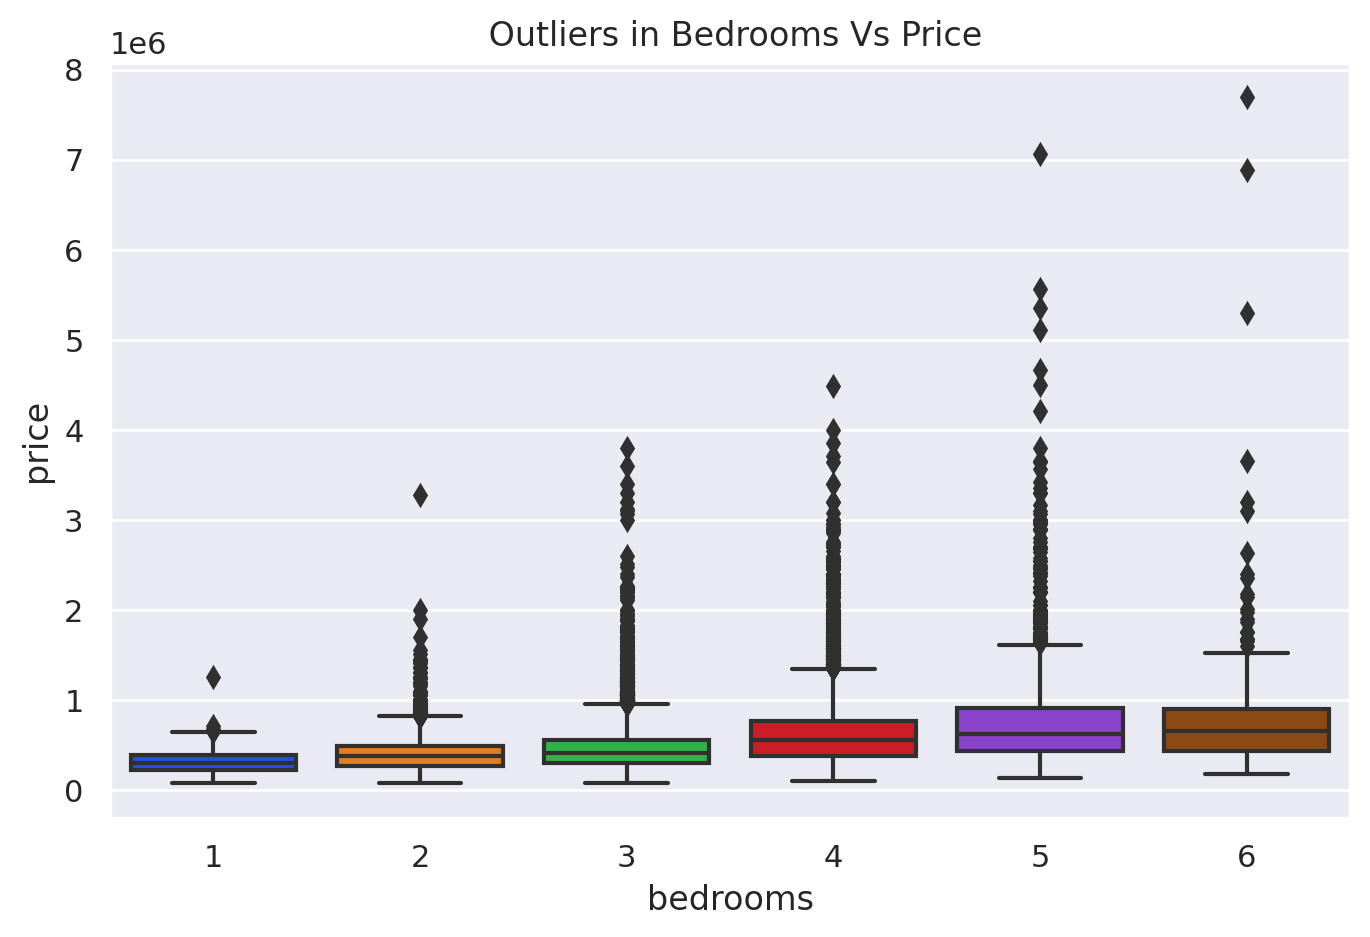

In [299]:
#Checking Our new Dataset
plt.figure(figsize=(8, 5), dpi=200)
sns.boxplot(data=df, y='price', x='bedrooms', palette= 'bright')
plt.title(' Outliers in Bedrooms Vs Price');

In [300]:
#Checking Shape of our Dataset

df.shape

(21535, 20)

In [301]:
#Exploring Our Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21535 non-null  int64  
 1   price          21535 non-null  float64
 2   bedrooms       21535 non-null  int64  
 3   bathrooms      21535 non-null  float64
 4   sqft_living    21535 non-null  int64  
 5   sqft_lot       21535 non-null  int64  
 6   floors         21535 non-null  float64
 7   waterfront     21535 non-null  int64  
 8   view           21535 non-null  int64  
 9   condition      21535 non-null  int64  
 10  grade          21535 non-null  int64  
 11  sqft_above     21535 non-null  int64  
 12  sqft_basement  21535 non-null  int64  
 13  yr_built       21535 non-null  int64  
 14  yr_renovated   21535 non-null  int64  
 15  zipcode        21535 non-null  int64  
 16  lat            21535 non-null  float64
 17  long           21535 non-null  float64
 18  sqft_l

In [302]:
#Checking for number of Unique Values in Our Columns
df.nunique()

id               21361
price             3616
bedrooms             6
bathrooms           29
sqft_living       1028
sqft_lot          9759
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         939
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5031
long               751
sqft_living15      776
sqft_lot15        8675
dtype: int64

In [303]:
# Previous removal of outliers in our dataset deleted all the No values (0) from 
#Our dataset
#Correcting that gives us all the classfications in the waterfront column for 
#example
df.waterfront.unique()

array([0, 1])

In [304]:
#Clearly removing outliers the way we have done yields the wrong results
#Our categorical data is negatively impact. We shall therefore proceed with only dropping
#Columns with bedrooms greater than 6 and retain all the important classifications
#in our categorical data. 

# Feature Engineering

In [305]:
# From external validation, we have established that our dataset is from Kings County
# available here: https://data.kingcounty.gov/ 
# The following Columns mean the following:
#sqft_above means the Square footage of the house that is above ground level
#sqft_basement means square footage if the interior house that is below ground level
# sqft_living15 and lot15 mean the square footage of interior housing space and the 
#parking lit space for the nearest 15 neighbours
#View is an index from 0-4 on how good the view of the propery was
#Condition is index from 1 to 5 on the apartment's condition with 5 being great
#Grade is an index between 1 and 13 where, 1-3 falls short of building construction
#and design, 7 has an average level of construction and design and 11-13 have
#a high quality level of construction and design

In [306]:
sqft_only = df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_renovated']]

In [307]:
sqft_only.head()

sqft_living  sqft_lot  sqft_living15  sqft_lot15  yr_renovated
0         1180      5650           1340        5650             0
1         2570      7242           1690        7639          1991
2          770     10000           2720        8062             0
3         1960      5000           1360        5000             0
4         1680      8080           1800        7503             0

In [308]:
#Given that sqft_living and lot15 are not that relevant for this study 
#we make the decision to drop them later before we start building our model

In [309]:
#We will create a new column and store it as geodata

geodata = [Point(xy) for xy in zip(df.long, df.lat)]

df['geodata']= geodata

# Saving Our Clean Dataset

In [310]:
df.to_csv('df.csv', index=False)

# **6. Exploratory Data Analysis (EDA)**

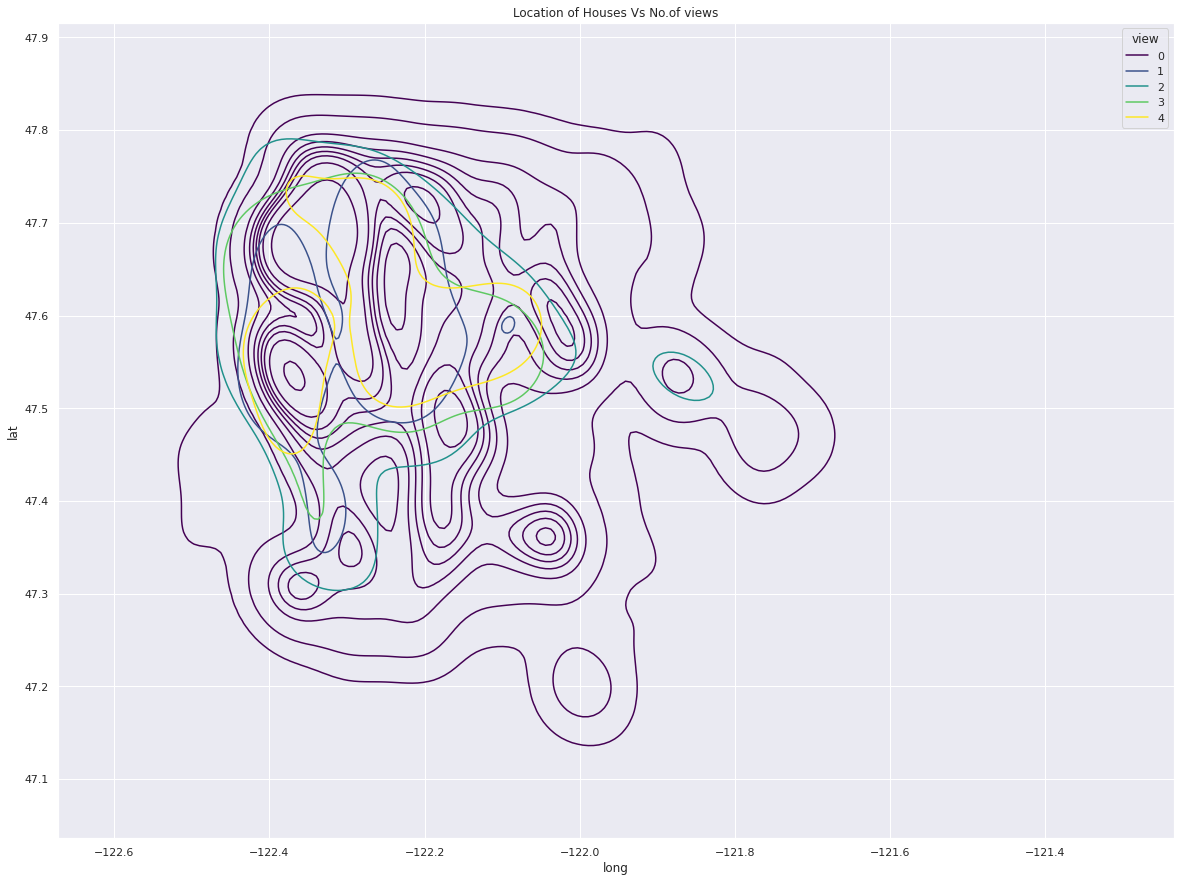

In [311]:
#Geographical Location of Houses and No of views
plt.figure(figsize=(20, 15))
sns.kdeplot(data=df, x='long', y='lat', hue='view', palette='viridis')
plt.title('Location of Houses Vs No.of views');

In [ ]:
#It is evident that majority of the houses did not receive a favourable view.
#Houses with view reviews of 1 to 4 are located betwen 47.3, -122.5 and 47.8, -122.0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


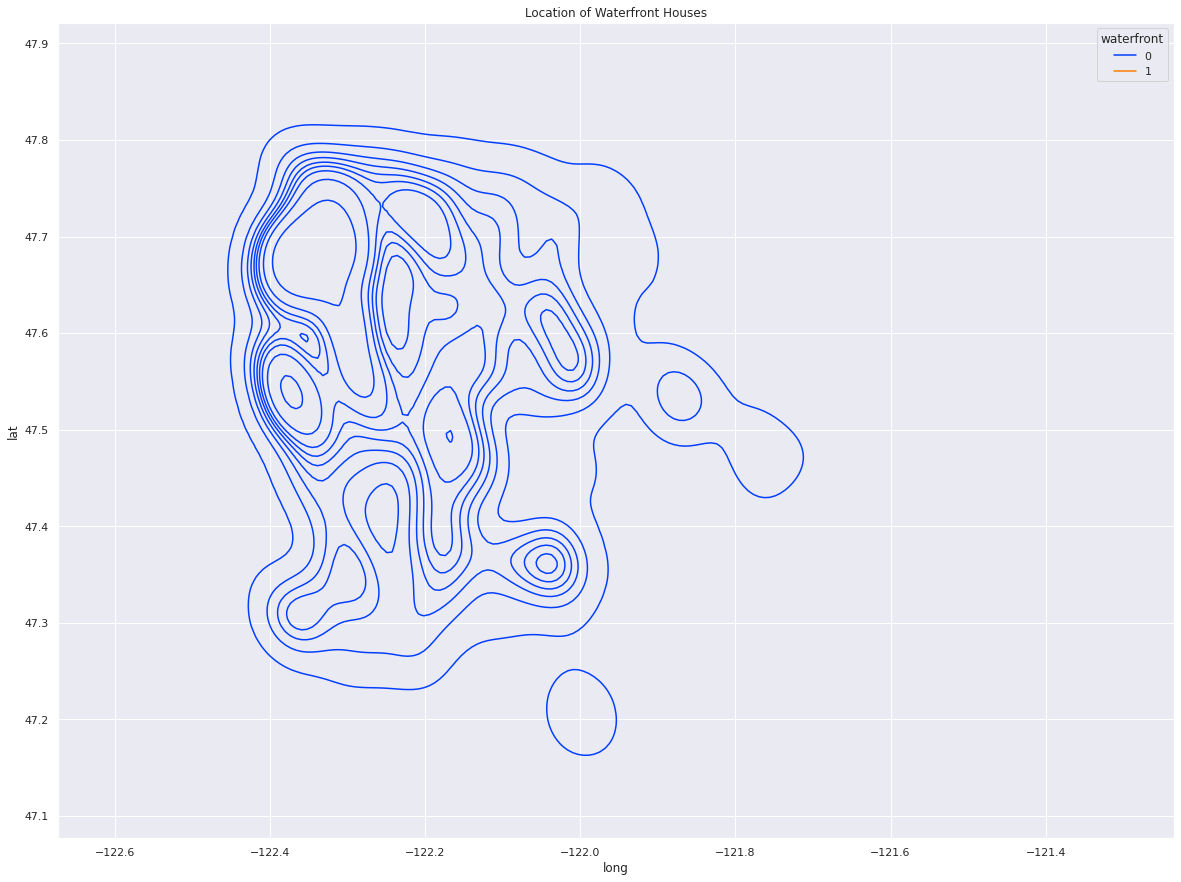

In [312]:
#Geographical Location of Houses and No of views
plt.figure(figsize=(20, 15))
sns.kdeplot(data=df, x='long', y='lat', hue='waterfront', palette='bright')
plt.title('Location of Waterfront Houses');

In [ ]:
#Very few houses are located by the waterfront. The number is so small that it
#cannot be visualised on the map

In [313]:
df[df['waterfront']==1]

id      price  ...  sqft_lot15                   geodata
49      822039084  1350000.0  ...       72513  POINT (-122.451 47.4041)
230    8096000060   655000.0  ...       13193  POINT (-122.375 47.4497)
246    2025069065  2400000.0  ...       18841  POINT (-122.072 47.6338)
264    2123039032   369900.0  ...       14267  POINT (-122.438 47.4683)
300    3225069065  3080000.0  ...       19508  POINT (-122.077 47.6053)
...           ...        ...  ...         ...                       ...
19984  2025069140  1900000.0  ...       38211  POINT (-122.071 47.6318)
20325   518500480  3000000.0  ...        5634  POINT (-122.205 47.5283)
20767  8043700105  2300000.0  ...        8525  POINT (-122.104 47.5724)
21201   518500460  2230000.0  ...        5762  POINT (-122.205 47.5285)
21576  9253900271  3570000.0  ...       18270   POINT (-122.11 47.5943)

[163 rows x 21 columns]

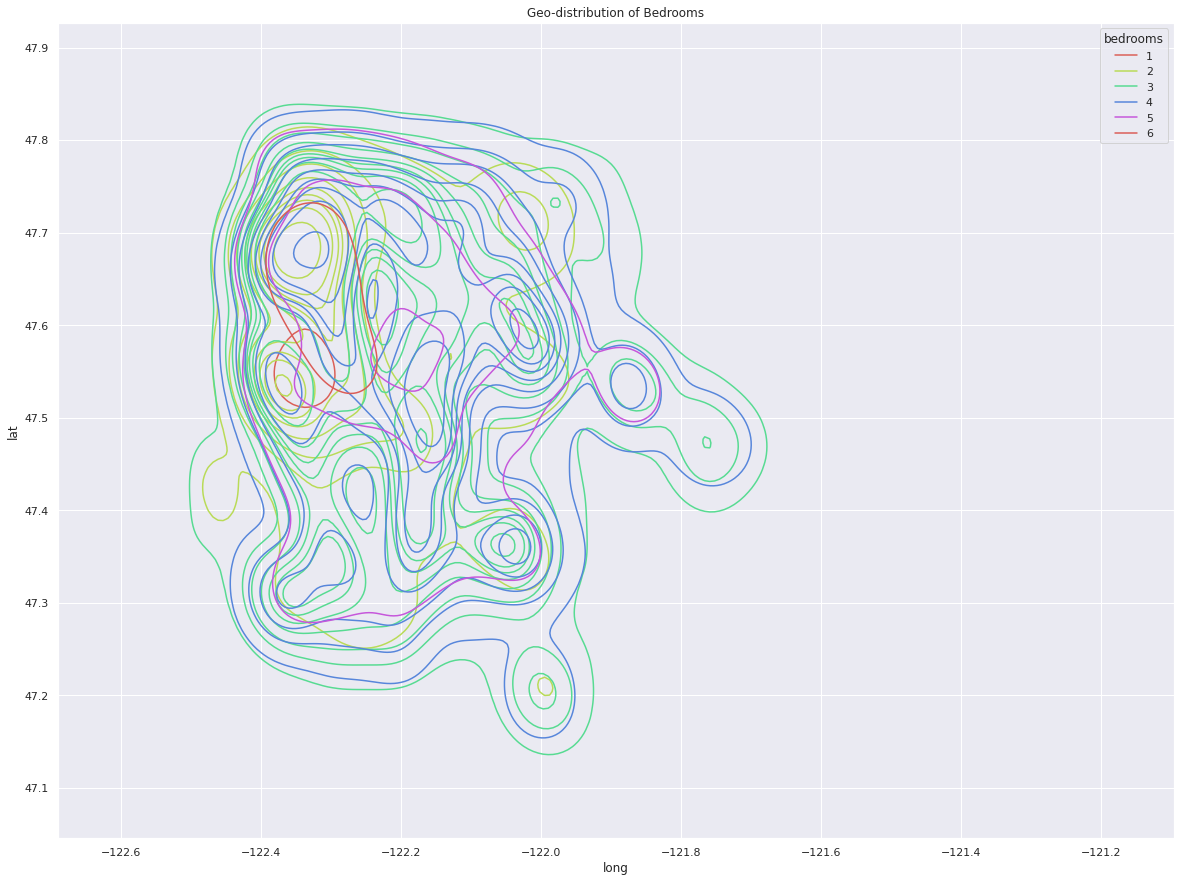

In [314]:
plt.figure(figsize=(20, 15))
sns.kdeplot(data=df, x='long', y='lat', hue='bedrooms', palette='hls')
plt.title('Geo-distribution of Bedrooms');

In [ ]:
#3 and 4 bedroomed houses can be found everywhere in King County-Washington
#It however, appears that if one wanted something different, then they would
#have to move further North. 

In [315]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'geodata'],
      dtype='object')

In [316]:
df.head(2)

id     price  ...  sqft_lot15                   geodata
0  7129300520  221900.0  ...        5650  POINT (-122.257 47.5112)
1  6414100192  538000.0  ...        7639   POINT (-122.319 47.721)

[2 rows x 21 columns]

# Univariate Analysis

In [317]:
#Summary Statistics of numerical data in our dataset

df_n = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

df_n.describe()


price   sqft_living  ...  sqft_living15     sqft_lot15
count  2.153500e+04  21535.000000  ...   21535.000000   21535.000000
mean   5.390494e+05   2075.004458  ...    1985.703320   12762.526910
std    3.652266e+05    909.844065  ...     684.642838   27274.904896
min    7.500000e+04    370.000000  ...     399.000000     651.000000
25%    3.210000e+05   1420.000000  ...    1490.000000    5100.000000
50%    4.500000e+05   1910.000000  ...    1840.000000    7620.000000
75%    6.430000e+05   2540.000000  ...    2360.000000   10083.000000
max    7.700000e+06  12050.000000  ...    6210.000000  871200.000000

[8 rows x 7 columns]

In [318]:
df_n.price.median()

450000.0

In [319]:
# The most expensive house goes for 7.7 million while the cheapest goes for
#75,000
#The average price for a house is about 54,000 whilst the median house
#price is 45,000

In [320]:
df.bedrooms.value_counts()

3    9822
4    6881
2    2760
5    1601
6     272
1     199
Name: bedrooms, dtype: int64

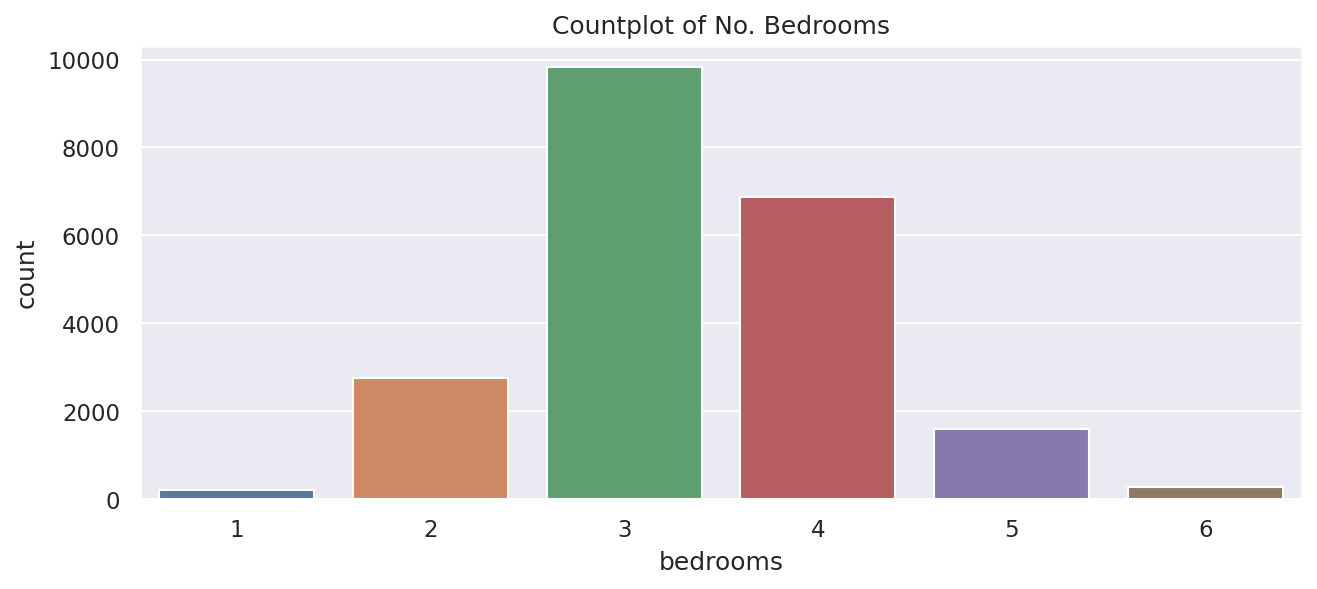

In [321]:
plt.figure(figsize=(10,4), dpi=150)
sns.countplot(data=df, x='bedrooms')
plt.title('Countplot of No. Bedrooms');

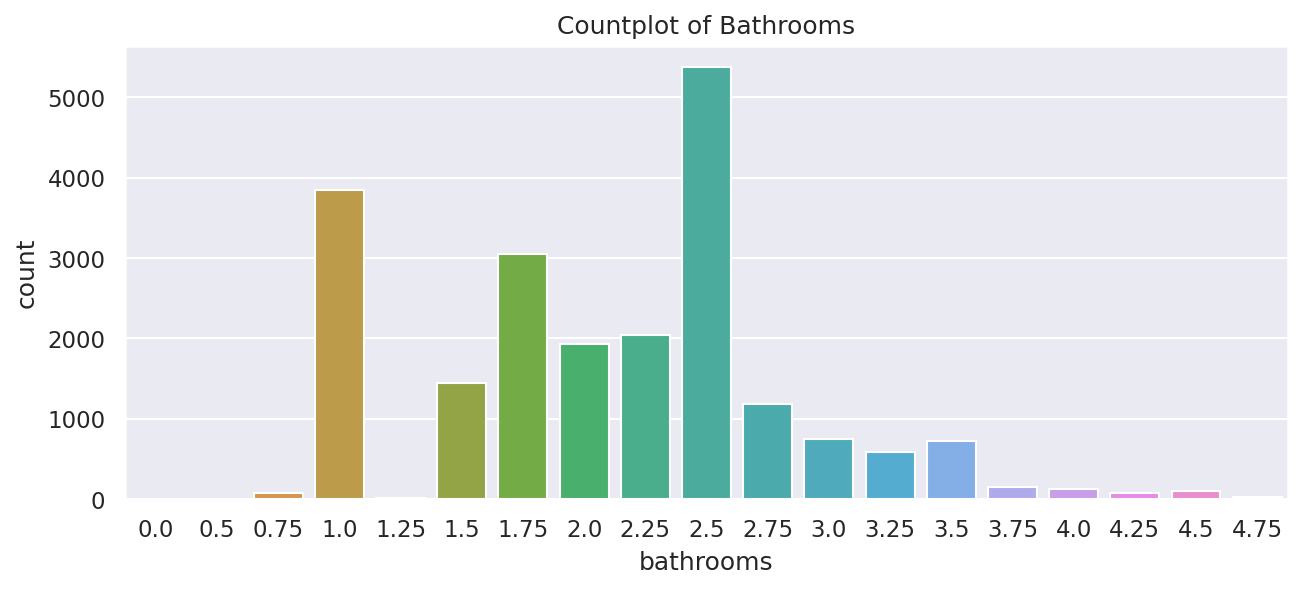

In [322]:
#Countplot of bathrooms with atleast 5 utilities
bat_no_five= df[df['bathrooms']<5]
plt.figure(figsize=(10,4), dpi=150)
sns.countplot(data=bat_no_five, x='bathrooms')
plt.title('Countplot of Bathrooms');

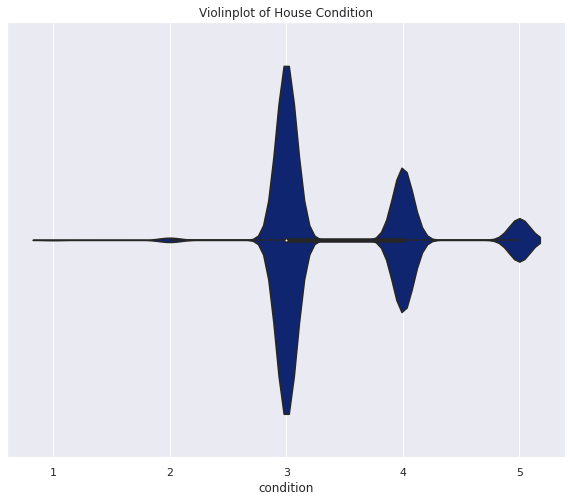

In [323]:
#Violin Plot of the Condition of the Houses
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='condition', palette='dark')
plt.title('Violinplot of House Condition');

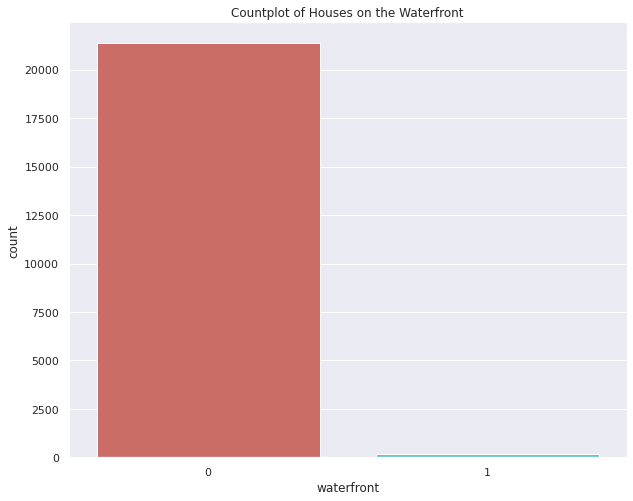

In [324]:
#Countplot of Houses on the Waterfront
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='waterfront', palette='hls')
plt.title('Countplot of Houses on the Waterfront');


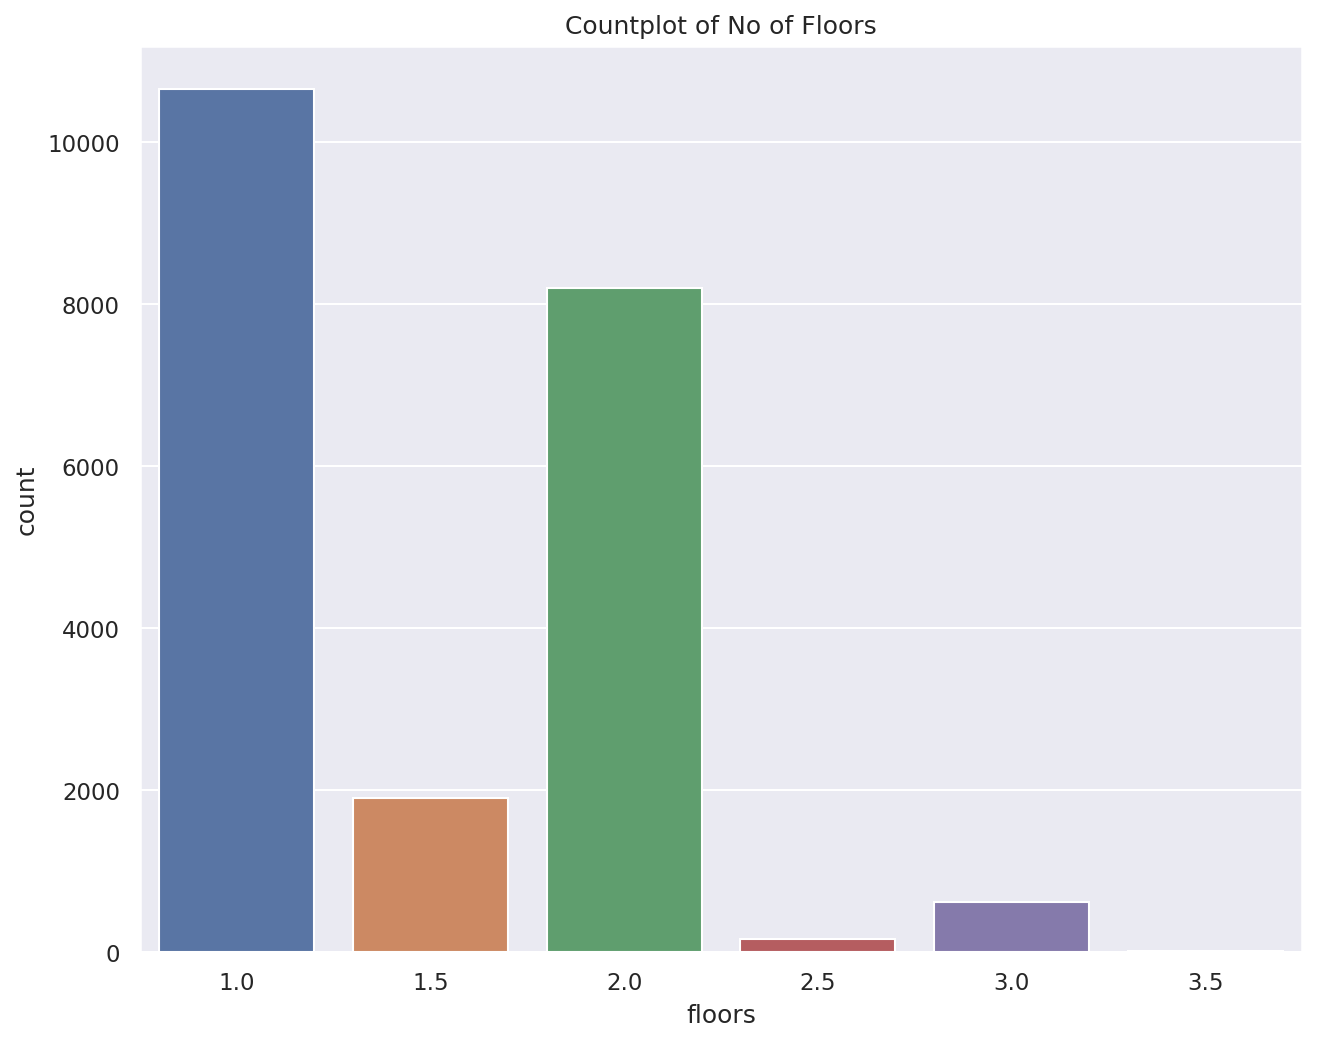

In [325]:
#Plotting Count of Floors
plt.figure(figsize=(10, 8), dpi=150)
sns.countplot(data=df, x='floors')
plt.title('Countplot of No of Floors');

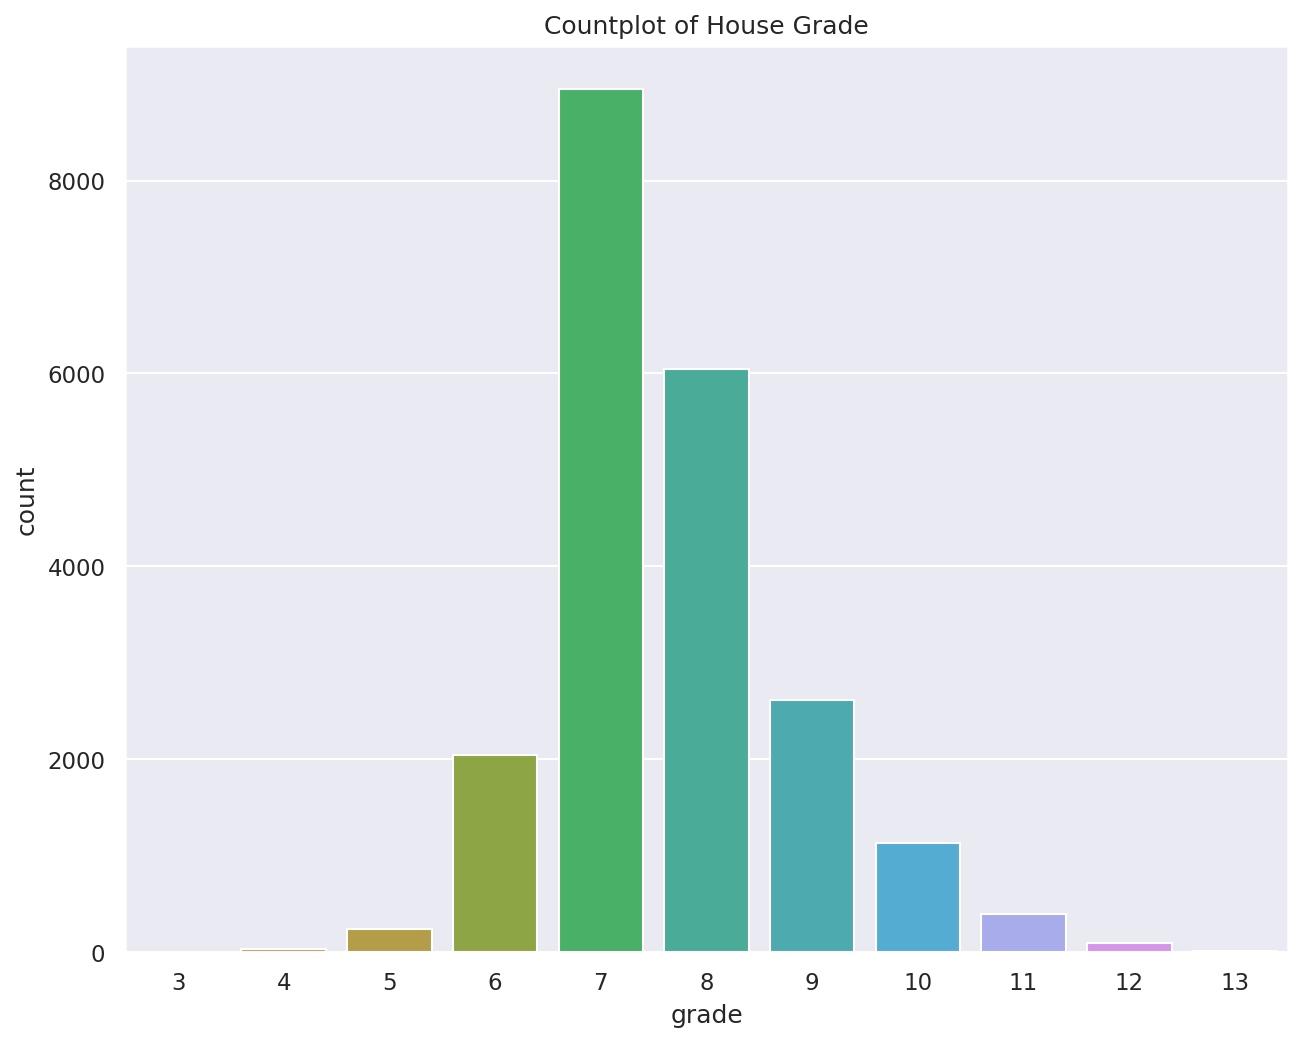

In [326]:
plt.figure(figsize=(10, 8), dpi=150)
sns.countplot(data=df, x='grade')
plt.title('Countplot of House Grade');

In [327]:
#Empirical Cumulative Frequency Distribution plots are a powerful way of exploring
#whether our data follows a normal distribution without succumbing to binning bias
#prevalent in the use of Histograms

# Create a function for computing and plotting the ECDF with default parameters
def plot_ecdf(data,title = "ECDF Plot", xlabel = 'Data Values', ylabel = 'Percentage'):
    
    """ 
    Function to plot ecdf taking a column of data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1, len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0.02)

In [328]:
# Creating our Empirical Cumulative Frequency Distribution function
def ecdf(data):
    """ 
    This function creates the x and y axis for an ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    return xaxis, yaxis

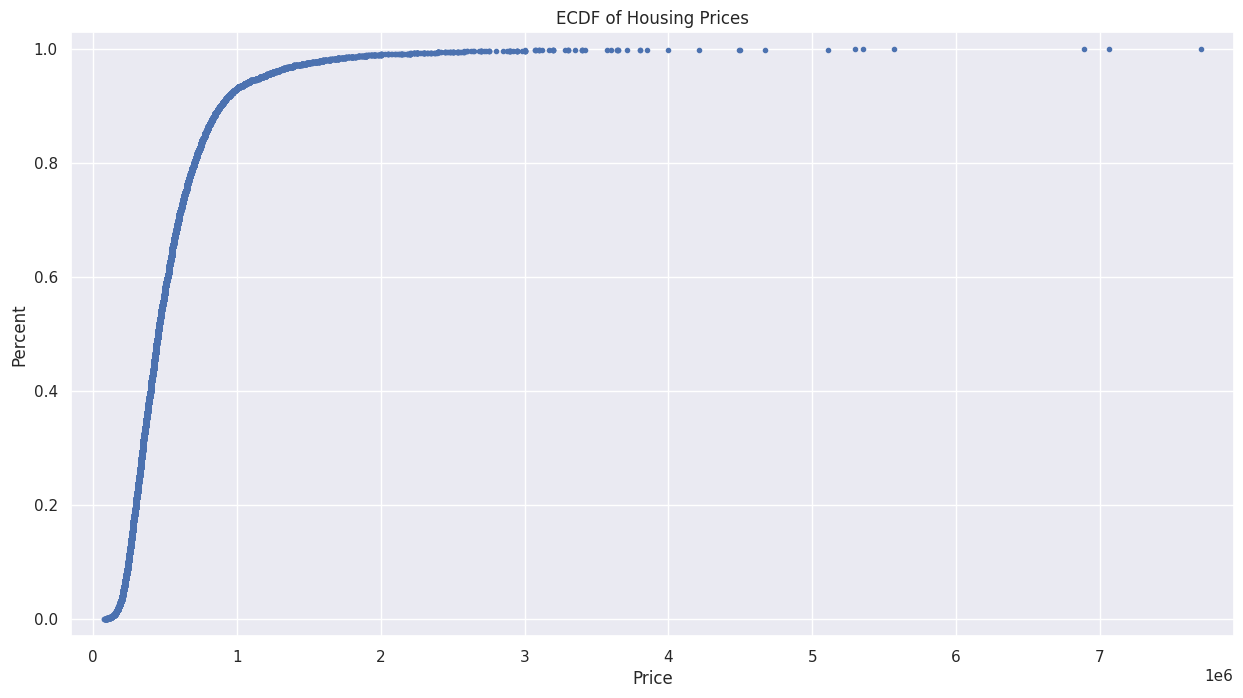

In [329]:
# Creating the xaxis and yaxis for our ecdf on the price of houses
x,y = ecdf(df['price'])

# Plotting our ecdf
plt.figure(figsize=(15,8), dpi=100)
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Percent')
plt.margins(0.03);

# Bivariate Analysis

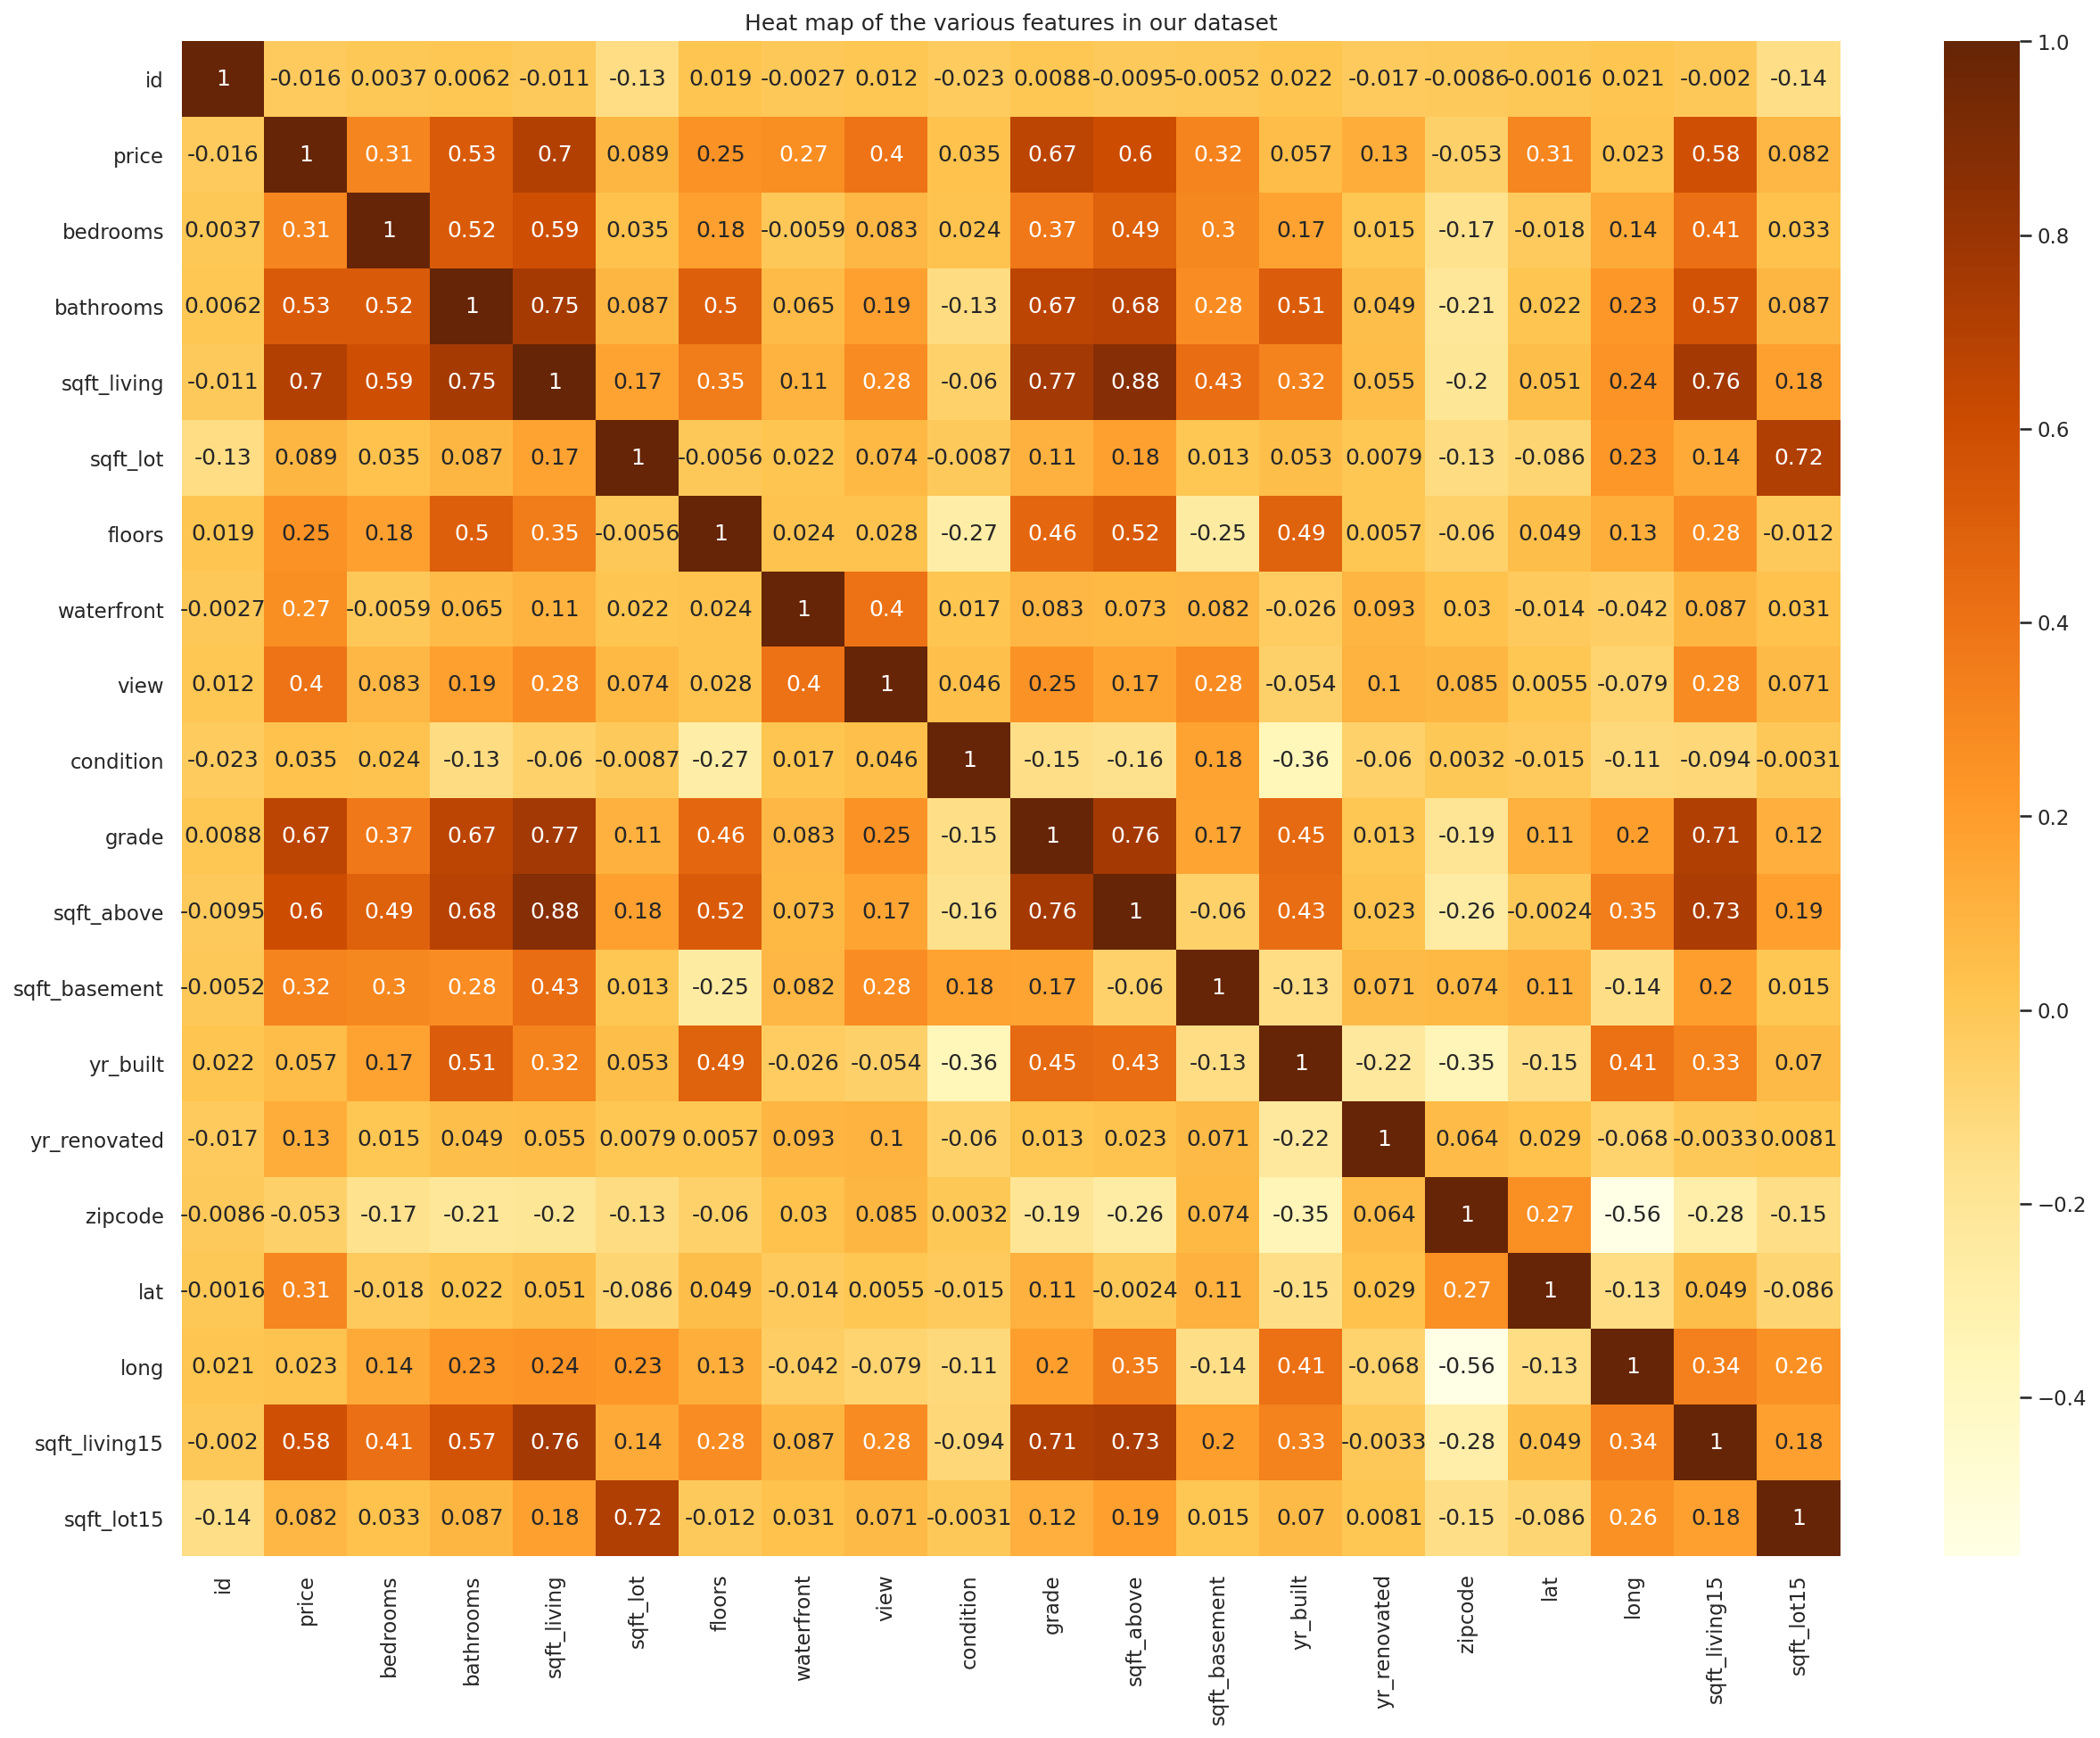

In [330]:
#Visualizing the correlation between the various features in our dataset
plt.figure(figsize=(20,15),dpi=150)
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr')
plt.title('Heat map of the various features in our dataset');

In [331]:
#Crossplots of features in our dataset
#to help us compare our variables side by side to draw relationships
#sns.pairplot(data=df, hue='condition', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
 #            size= 4 );

In [332]:
df.head(1)

id     price  ...  sqft_lot15                   geodata
0  7129300520  221900.0  ...        5650  POINT (-122.257 47.5112)

[1 rows x 21 columns]

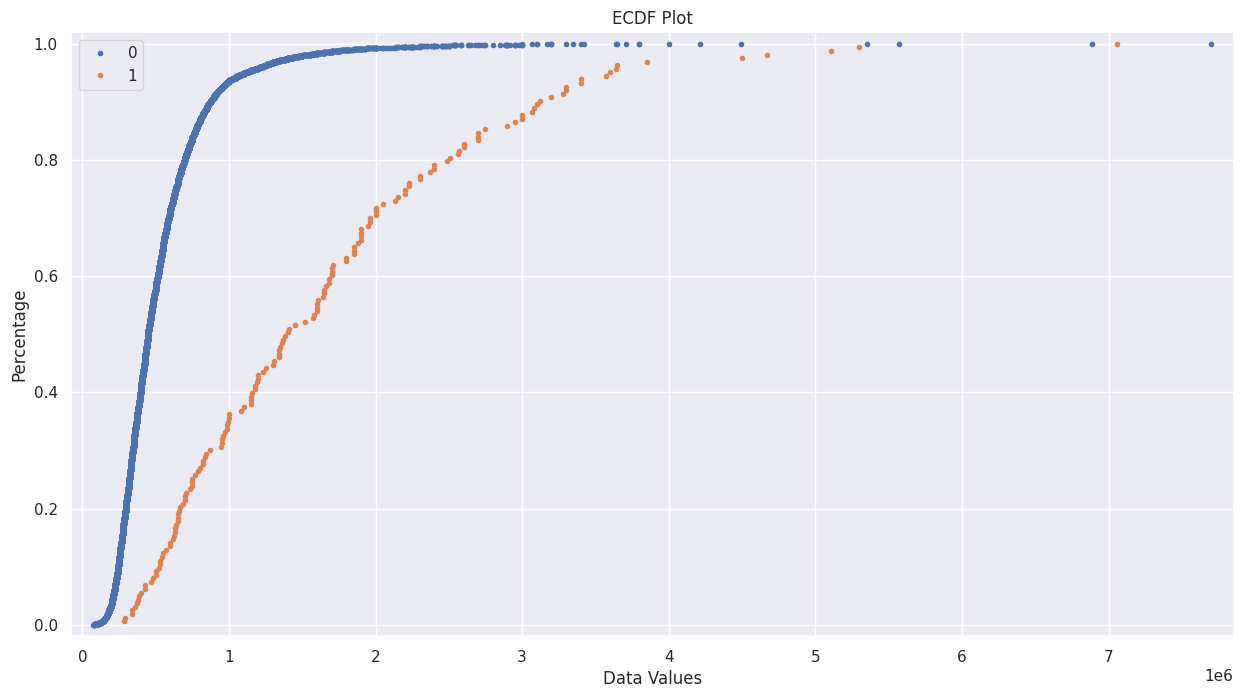

In [333]:
#ECDF of Price Vs Waterfront
waterfront= df.waterfront.unique()
plt.figure(figsize=(15,8), dpi=100)
plot_ecdf(df['price'][df.waterfront==0])
plot_ecdf(df['price'][df.waterfront==1])
plt.legend(labels=waterfront[::]);

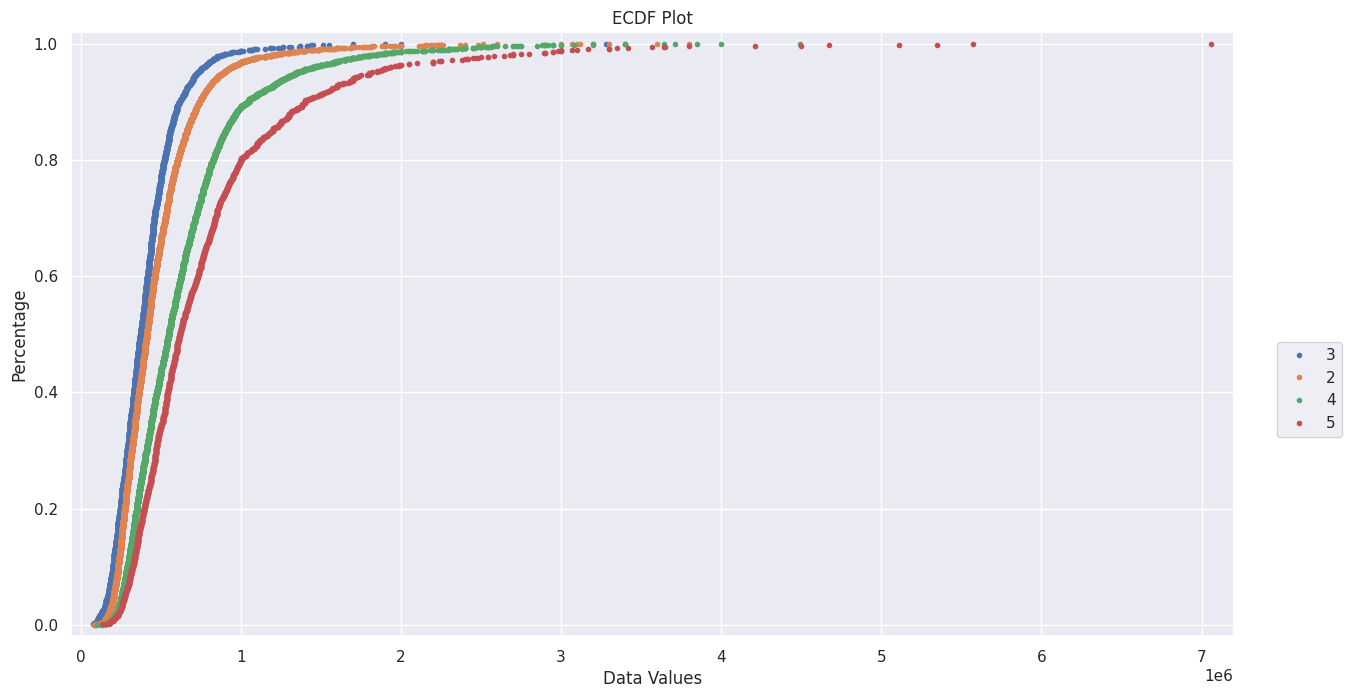

In [334]:
#Ecdf of 2,3,4 and 5 Bedrooms and Price
bedrooms= df.bedrooms.unique()
plt.figure(figsize=(15,8), dpi=100)
plot_ecdf(df['price'][df.bedrooms==2])
plot_ecdf(df['price'][df.bedrooms==3])
plot_ecdf(df['price'][df.bedrooms==4])
plot_ecdf(df['price'][df.bedrooms==5])
plt.legend(bbox_to_anchor= (1.1, 0.5), labels=bedrooms[::]);

In [335]:
df.head(1)

id     price  ...  sqft_lot15                   geodata
0  7129300520  221900.0  ...        5650  POINT (-122.257 47.5112)

[1 rows x 21 columns]

In [336]:
#sns.boxenplot(data=df, x='price', y='sqft_living15')

Text(0.5, 1.0, 'Trend Analysis of House of Price Vs Year Built')

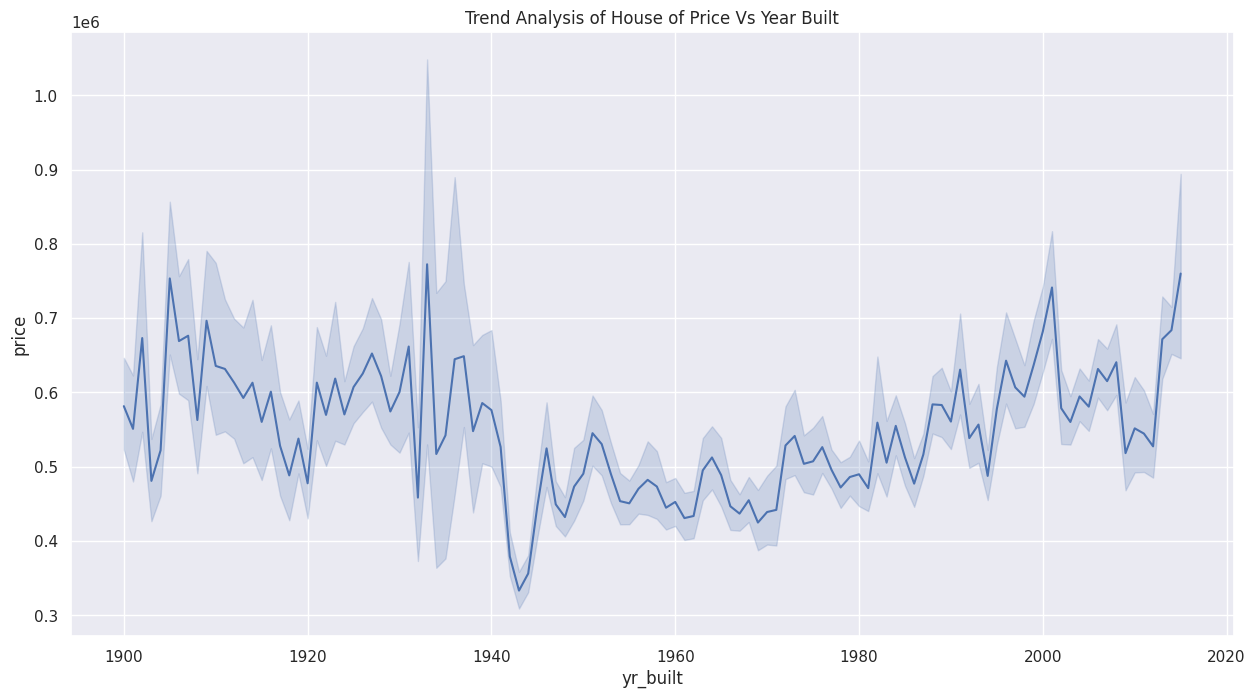

In [337]:
#Line Plot of house prices compare to the year a house was built
plt.figure(figsize=(15,8), dpi=100)
sns.lineplot(data=df, x='yr_built', y='price')
plt.title('Trend Analysis of House of Price Vs Year Built')

# Multivariate Analysis

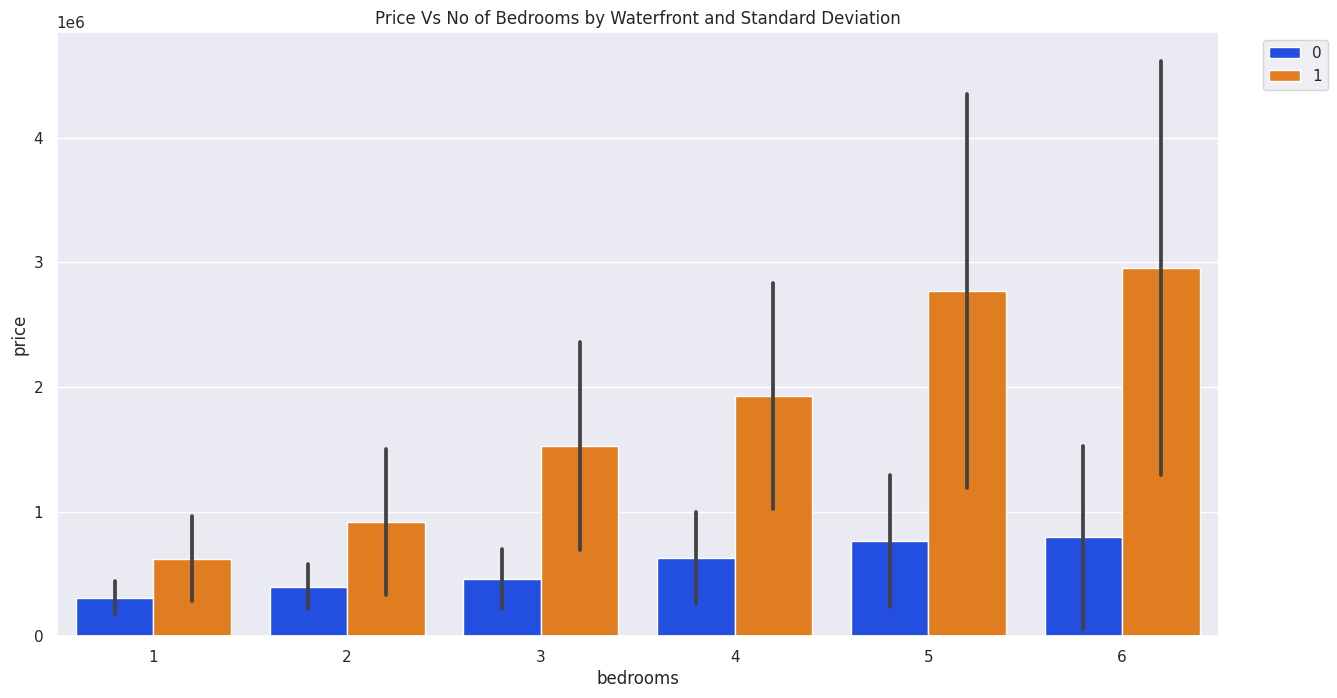

In [338]:
#Standard Deviation of Price considering the number of bedrooms and whether the
#house has a waterfront or not
plt.figure(figsize=(15,8), dpi=100)
sns.barplot(data=df, x='bedrooms',y='price', estimator=np.mean, ci='sd', hue='waterfront', palette='bright')
plt.legend(bbox_to_anchor= (1.1, 1))
plt.title('Price Vs No of Bedrooms by Waterfront and Standard Deviation');


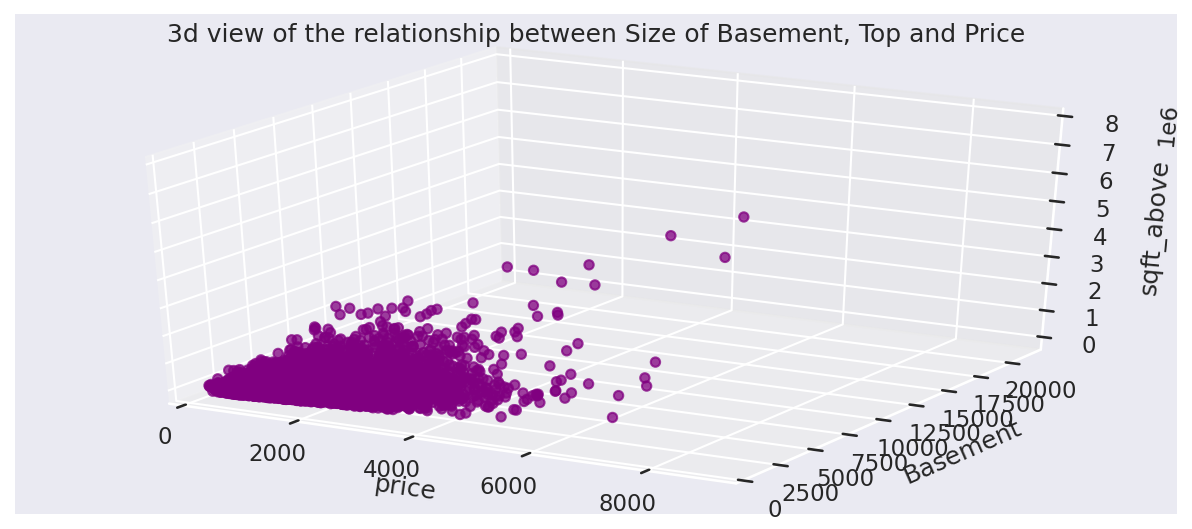

In [339]:
#3-D plot of Basement size, top size vs Price
fig=plt.figure(figsize=(22, 15), dpi=150)
ax=fig.add_subplot(3,2,1, projection="3d")
ax.scatter(df['sqft_above'],df['sqft_basement'],df['price'],c="purple",alpha=.75)
ax.set(xlabel='price',ylabel='Basement',zlabel='sqft_above')
ax.set(ylim=[0,22000])
plt.title('3d view of the relationship between Size of Basement, Top and Price');

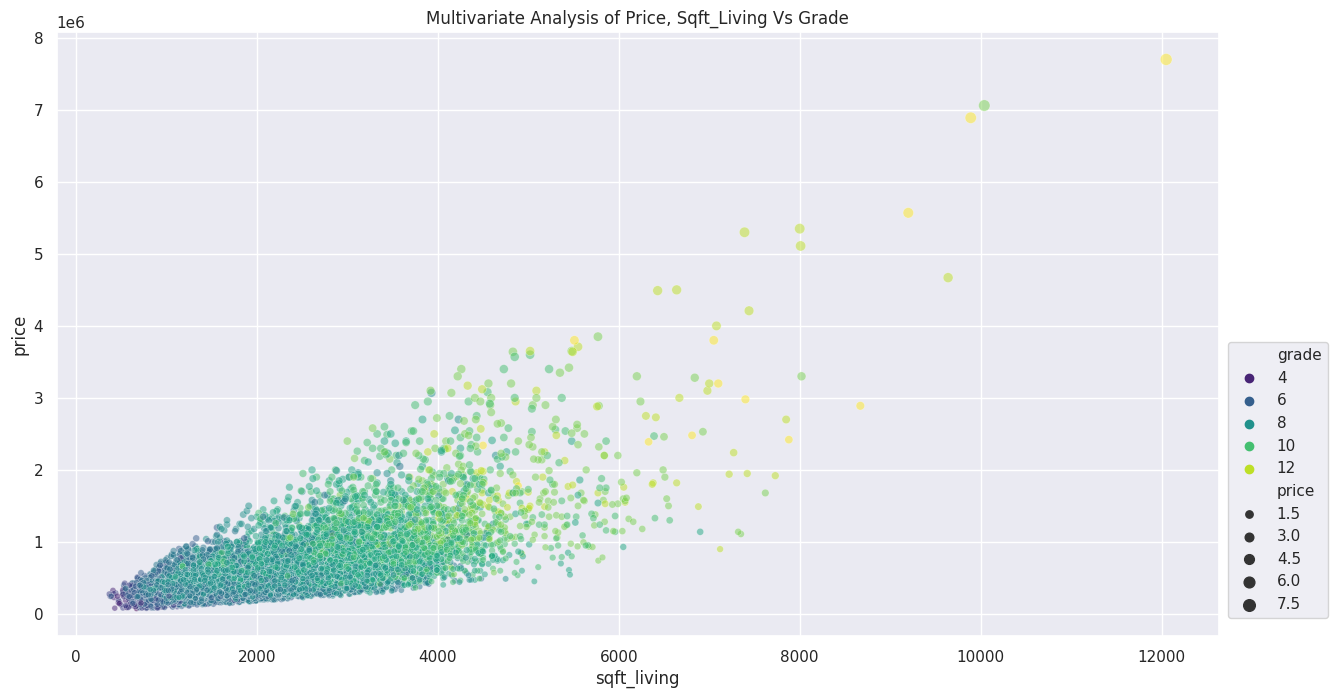

In [340]:
#Plot of the relationship between size of house and its prices vs grade
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='sqft_living', y='price', size='price', hue='grade',alpha=0.5, palette='viridis')
plt.title('Multivariate Analysis of Price, Sqft_Living Vs Grade')
plt.legend(bbox_to_anchor=(1.1, 0.5));

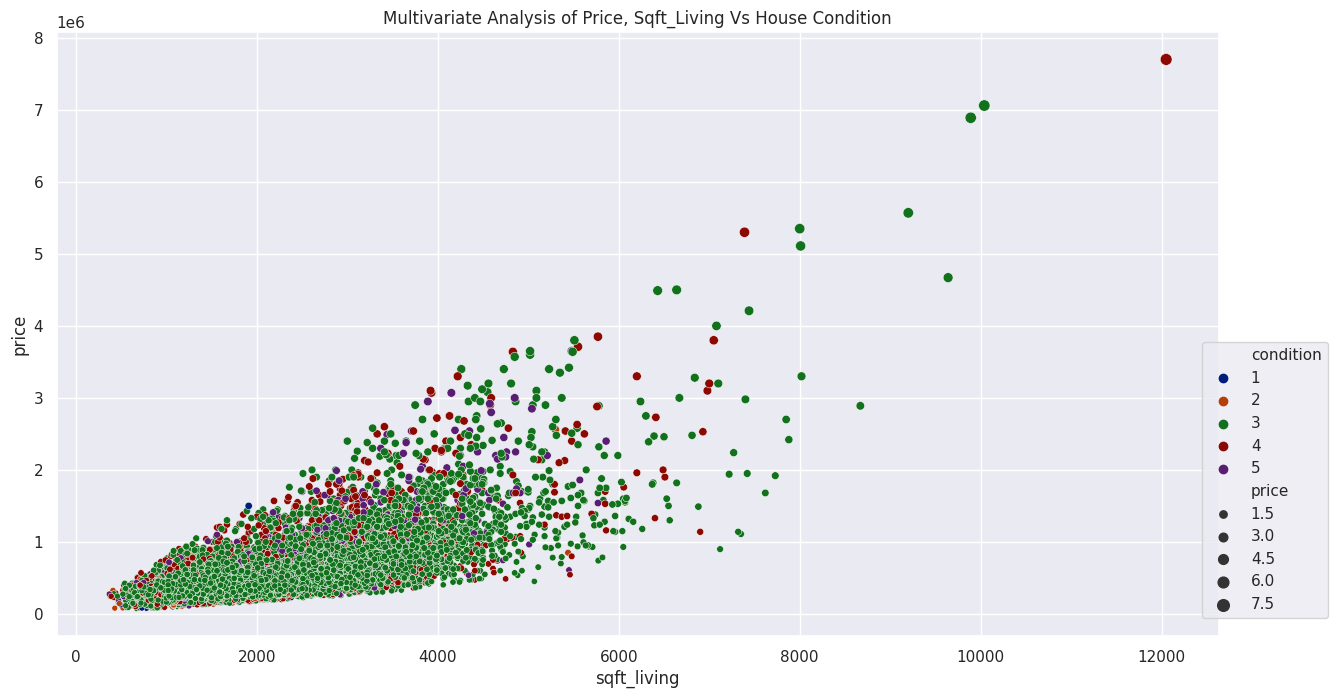

In [341]:
#Plot of the relationship between size of house and its prices vs condition
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='sqft_living', y='price', size='price', hue='condition',  palette='dark')
plt.title('Multivariate Analysis of Price, Sqft_Living Vs House Condition')
plt.legend(bbox_to_anchor=(1.1, 0.5));

Text(0.5, 1.0, 'Trend Analysis of House of Price Vs Year Built')

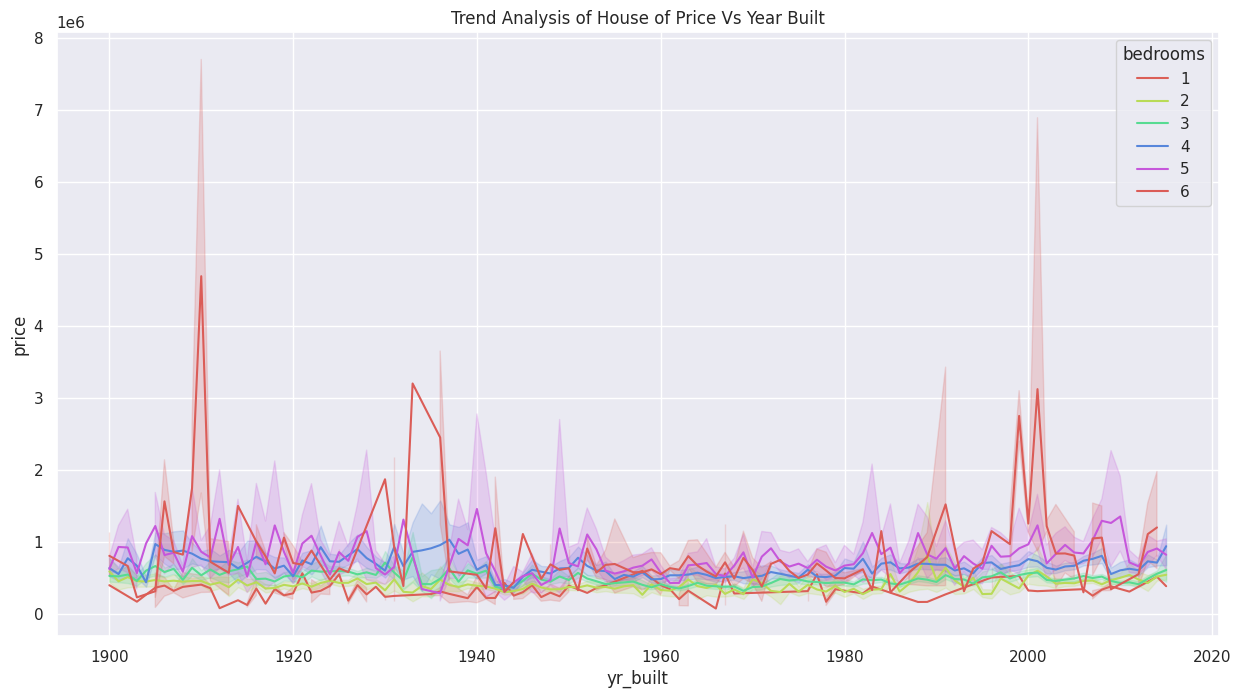

In [342]:
#Line Plot of house prices compare to the year a house was built by the number of
#bedrooms
plt.figure(figsize=(15,8), dpi=100)
sns.lineplot(data=df, x='yr_built', y='price', hue='bedrooms', palette='hls')
plt.title('Trend Analysis of House of Price Vs Year Built')

# **7. Implementing the Solution**

# Multicollinearity Check

In [343]:
#Before implementing Our Solution, we have to ensure that our dataset is fit for
#use i.e., it follows the assumptions under the Classical Linear Regression Model
#The assumptions of the classical linear regression model include:
#Linearity
#No endogeneity
#Normality & Homoscedasticity
#No autocorrelation
#No Multicollinearity

#Multicollinearity is observed when two or more explanatory variables
#are very highly correlated

#The problem with ignoring multicollinearity if present is that
# 1. our R2 will be high but the individual coefficents will
#have high standard errors
#2. THe regression becomes very sensitive to small changes 
#in the specification
#As such confidence intervals for the parameters will be very
#wide, and significance tests might yield inappropriate conclusions
#3. Our model may be trained inefficiently

In [344]:
df.head(1)

id     price  ...  sqft_lot15                   geodata
0  7129300520  221900.0  ...        5650  POINT (-122.257 47.5112)

[1 rows x 21 columns]

In [345]:
#As mentioned in the feature engineering section, we will drop the following columns
#as they are not useful in answering the question under study.
#sqft of 15 neighbours's living and parking lot will not play
#a huge role in the sale of a house. 
#From the pair plot, we saw geolocation has a slight relationship with price, however,
#since we have zipcode in our dataset, we proceed to drop longitudes and latitudes
df.drop(['id', 'sqft_living15', 'sqft_lot15', 'lat', 'long', 'geodata'], axis=1, inplace=True)

In [346]:
df.head()

price  bedrooms  bathrooms  ...  yr_built  yr_renovated  zipcode
0  221900.0         3       1.00  ...      1955             0    98178
1  538000.0         3       2.25  ...      1951          1991    98125
2  180000.0         2       1.00  ...      1933             0    98028
3  604000.0         4       3.00  ...      1965             0    98136
4  510000.0         3       2.00  ...      1987             0    98074

[5 rows x 15 columns]

In [347]:
#We check for multicollinearity by using 
#Correlation and the Variance Inflection Factor (VIF)
#VIF is a measure of how much variance of a regression coefficient in a model
#increases if the explanatory variables are correlated.
#A VIF of one means there is no correlation
#If the VIF is between 5 & 10, then there is a big problem and solutions
#for the high correlation have to be explored.

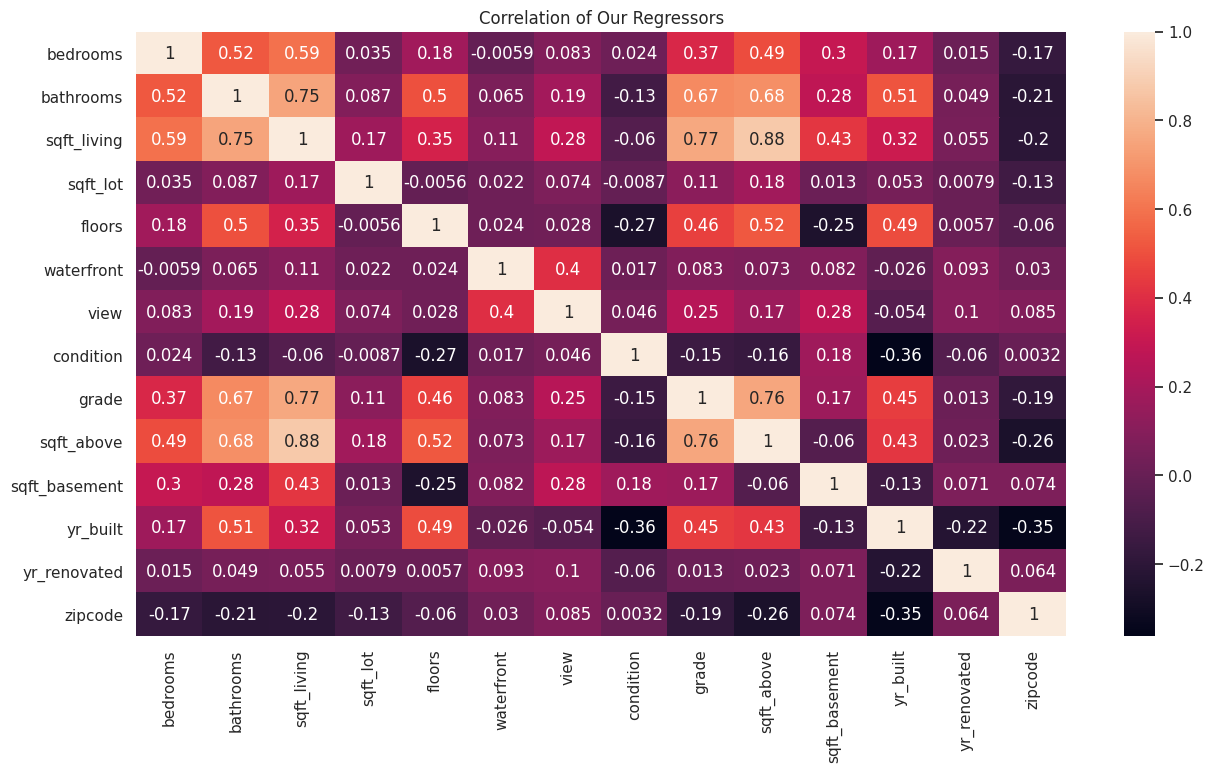

In [348]:
regressors= df.drop('price', axis=1)
plt.figure(figsize=(15,8), dpi=100)
sns.heatmap(regressors.corr(), annot=True)
plt.title('Correlation of Our Regressors');

In [349]:
#Deriving the Correlations Overview

regressors= regressors.corr()

In [350]:
#Computing the Variance Inflection Factor

pd.DataFrame(np.linalg.inv(regressors.values), index = regressors.index, columns=regressors.columns)

bedrooms  bathrooms  ...  yr_renovated   zipcode
bedrooms       1.689672  -0.445053  ...      0.044895  0.087758
bathrooms     -0.445053   3.358629  ...     -0.259497  0.002596
sqft_living   -0.101513  -2.286884  ...      0.014100 -0.245662
sqft_lot       0.110983   0.032087  ...     -0.004591  0.096819
floors         0.044958  -0.716510  ...     -0.079649 -0.301504
waterfront     0.067710   0.008032  ...     -0.067231  0.008116
view           0.112066  -0.032108  ...     -0.031961 -0.106242
condition     -0.056939  -0.143822  ...      0.201465  0.169249
grade          0.332345  -0.279084  ...     -0.013730 -0.050539
sqft_above    -0.821603   0.887486  ...      0.009769  0.500595
sqft_basement -0.460958   0.033482  ...     -0.004268  0.010002
yr_built       0.109092  -0.919327  ...      0.508533  0.524519
yr_renovated   0.044895  -0.259497  ...      1.144244  0.058326
zipcode        0.087758   0.002596  ...      0.058326  1.268003

[14 rows x 14 columns]

In [351]:
#The VIF for our regressors are the diagonal values from left to right. 
#Our VIFs are about between negative and 3.3 values with most of the values being either one or close to one. We therefore conclude our variables are not highly correlated.

# The Model

# **a.) Multiple Linear Regression**

In [352]:
#Checking our dataset
df.head()

price  bedrooms  bathrooms  ...  yr_built  yr_renovated  zipcode
0  221900.0         3       1.00  ...      1955             0    98178
1  538000.0         3       2.25  ...      1951          1991    98125
2  180000.0         2       1.00  ...      1933             0    98028
3  604000.0         4       3.00  ...      1965             0    98136
4  510000.0         3       2.00  ...      1987             0    98074

[5 rows x 15 columns]

In [353]:
#Define our regressors (X) and regressand(y)

#Our regressors
X= df.drop('price', axis=1)

#Our regressand
y=df['price']

In [354]:
#Checking values in our regressor
X.values

array([[3.0000e+00, 1.0000e+00, 1.1800e+03, ..., 1.9550e+03, 0.0000e+00,
        9.8178e+04],
       [3.0000e+00, 2.2500e+00, 2.5700e+03, ..., 1.9510e+03, 1.9910e+03,
        9.8125e+04],
       [2.0000e+00, 1.0000e+00, 7.7000e+02, ..., 1.9330e+03, 0.0000e+00,
        9.8028e+04],
       ...,
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 2.0090e+03, 0.0000e+00,
        9.8144e+04],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, ..., 2.0040e+03, 0.0000e+00,
        9.8027e+04],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 2.0080e+03, 0.0000e+00,
        9.8144e+04]])

In [355]:
#Shape of our regressor
X.shape

(21535, 14)

In [356]:
#Shape of our regressand
y.shape

(21535,)

# **Performing Multilinear Regression**

In [357]:

#Performing a Linear Regression and then compare it with quantile regression, lasso
#ridge and elasticnet

#Importing the train_test_split library
from sklearn.model_selection import train_test_split

#Specifying our train and test variable
#Given the size of our dataset, a test size of 0.3 is appropriate
#We retain the default 42 random_state to reshuffle out data to prohibited sorted values
# from being trained leading to erroneous results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [358]:
#Checking length of our X_test
#We expect to see 30% of the data as its length
len(X_test)

6461

In [359]:
#Checking length of X_train
#Should have 70% of the data
len(X_train)

15074

In [360]:
#We need to standardize our data to enable comparability
#To do this we leverage SK Learn 

#from sklearn.preprocessing import StandardScaler

#Instantiaitng Our Scaler

#scaler = StandardScaler()

#Fitting X_train to the scaler

#scaler.fit(X_train)

In [361]:
#Transforming Our Data
#X_train = scaler.transform(X_train)

#X_test = scaler.transform(X_test)

In [362]:
#To carry out the regression, we leverage SKLearn and import Linear Regression
from sklearn.linear_model import LinearRegression

In [363]:
#Instantiate the model
ln_model = LinearRegression()

In [364]:

#Training Our Model
#We expose our model(X_train and y_train) to 70% of the data
ln_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [365]:
X_train

bedrooms  bathrooms  sqft_living  ...  yr_built  yr_renovated  zipcode
993           3       2.00         1490  ...      1988             0    98003
2452          5       3.00         3655  ...      1955             0    98008
1892          3       1.00         2150  ...      1954             0    98177
13679         3       1.75         1660  ...      1967             0    98056
11638         3       1.75         1510  ...      1910             0    98119
...         ...        ...          ...  ...       ...           ...      ...
11324         2       2.50         1860  ...      2003             0    98038
12004         3       1.75         1600  ...      1929             0    98102
5408          3       2.00         1970  ...      1967             0    98003
861           3       1.00          910  ...      1951             0    98115
15856         3       1.75         1790  ...      1978             0    98052

[15074 rows x 14 columns]

In [366]:
#Checking Our Intercept and whether Our coefficients are positive or negative


print('Intercept', ln_model.intercept_)
pd.DataFrame(data= ln_model.coef_, index=X_train.columns, columns=['coef'])

Intercept 10599348.181120234


coef
bedrooms       -46445.607806
bathrooms       47523.282397
sqft_living       115.872677
sqft_lot           -0.271399
floors          26685.385157
waterfront     611710.291946
view            43854.964184
condition       17878.275139
grade          125214.159985
sqft_above         52.280732
sqft_basement      63.591945
yr_built        -3587.428613
yr_renovated       10.408653
zipcode           -44.421190

In [367]:
#Testing our model
#Having trained our model, we pass our untrained data- the 30% into the trained
#model and draw predictions of what our new regressands with different 
#feature combinations.
y_pred = ln_model.predict(X_test)

# **Model Evaluation**

In [368]:
#Performance Evaluation 
#To evaluate the performance of our model, we shall look
#at the following:
#Mean Absolute Error
#Mean Squared Error
#Root Mean Square Error

#The Mean Absolute Error is basically the difference between our predicted
#regressand and the mean value of our initial regressand.

#The Mean Squared Error on the other hand is the squared difference between the
#predicted regressand and the initial regressand. It is squared to remove the 
#cancellation effect of adding points above and below the regression line.

#The Root Mean Square Error on the other hand is the square root of the Mean Squared
#Error and a better measure of the variance as the Mean Square Error punishes
#Any deviations heavily.

In [369]:
#We leverage SKLearn to get the Mean Absolute Error and Mean Squared Error to
#evaluate the performance of our model.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [370]:
#Deriving the average price from our house dataset
df.price.mean()

539049.4117483167

In [371]:
#Computing our Mean absolute error and storing it as Mea_ln

mea_ln = mean_absolute_error(y_test, y_pred)
mea_ln

140718.90477992827

In [372]:
#Computing Our RMSE
rmse_ln = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_ln

222792.3949890893

In [373]:
#Computing Our R2 Score
ln_r2score =r2_score(y_test, y_pred)

ln_r2score

0.6337795663683088

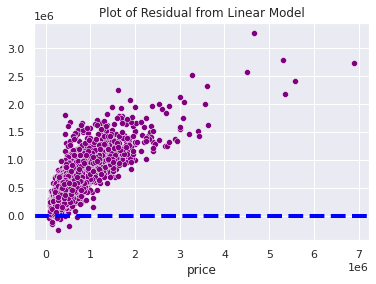

In [374]:
#Plotting Residuals to determine viability of our model
#A residual plot is helpful in determining whether the error
#follows the assumptions of a classical linear regression model, 
#in prticular, that the there is no variance between the errors


#Let's derive the residuals
test_residual = y_test-y_pred

#Plotting 
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.axhline(y=test_residual.mean(), color='blue', ls='--', lw=4)
plt.title('Plot of Residual from Linear Model');

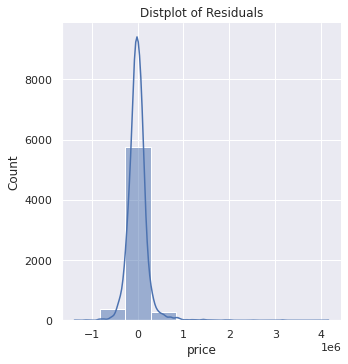

In [375]:
#Visualizing Our Residual Using a Distplot
sns.displot(test_residual, bins=10, kde=True)
plt.title('Distplot of Residuals');

In [376]:

#Applying the Bartlett's test to check whether our residuals are homoscedasticity.
#We are testing the null hypothesis that there is a constant variance in the data
# and that there are no specific patterns.

In [377]:

#Importing Relevant Libraries from SCIPY
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, test_residual)

# To help us interpret the results we must also compute 
#a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2.8387370353368803e-107
the variances are homogeneous!


# **b.) Quantile Regression**

**Intuition**

Quantile Regression is a powerful machine technique that is frequently used to make predictions on what bounds the regressands of tested data may belong to. Applying this idea to our current problem, quantile regression will help determine the bounds our predited housing prices may take . 

Quantile Regression models for Conditional Quantiles of the regressors. Whilst the Ordinary Least Squares Approach models for the conditional mean- which is a single values, QR allows for the investigation of various considerations of the regressors and their impact on the regressand. For instance, To what extend would a house with condtion 5 or grade 13 influence price of the house. How does grade 2 and condition 2 compare? As such, QR is a better model when we would like to explore other factors beyond the mean. 

Linear regression may not be a suitable model because it assumes a single interpretation for marginal effect. i.e. at different data bounds, it draws the same conclusion. 

**Advantages**
We have some outliers in our housing dataset and given that QR leverages the median approach, it would be more robust to those outliers. Furthermore, it deals better with data that doesn't quite abide by the assumptions and the Classical Linear Regression Model i.e normality and homoscedasticity.

That is why we adopt it here. 



In [493]:
#In the Multiple linear regression model, we considered the the conditional mean 
#of the total effect our variables had on the price. In this section, we shall 
#focus on the relationship at different levels of our variables. 

#First, lets prepare our variables

df.head()

X= df.drop('price', axis=1)
y=df['price']

In [494]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode'],
      dtype='object')

In [495]:
# We will use the python package statsmodels for Quantile Regression because
#Scikit Learn Does not have Quantile Regression yet
import statsmodels.formula.api as smf

In [496]:
#Instantiating Our Model
mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement ', df)

#Fitting Our Model
res = mod.fit(q=0.5, max_iter=1000000)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000000) reached.
  ") reached.", IterationLimitWarning)


In [497]:
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2650
Model:                       QuantReg   Bandwidth:                   3.012e+04
Method:                 Least Squares   Sparsity:                    4.356e+05
Date:                Thu, 22 Apr 2021   No. Observations:                21535
Time:                        03:49:03   Df Residuals:                    21528
                                        Df Model:                            6
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.332e+05   6830.038     19.496      0.000     1.2e+05    1.47e+05
bedrooms      -5.622e+04   2146.971    -26.184      0.000   -6.04e+04    -5.2e+04
bathrooms     -7475.9339   3287.151     -2.274      0.023   -1.39e+04   -1032.875
sqft_living     243.9569      2.884  

In [384]:
help(smf.quantreg)

Help on method from_formula in module statsmodels.base.model:

from_formula(formula, data, subset=None, drop_cols=None, *args, **kwargs) method of builtins.type instance
    Create a Model from a formula and dataframe.
    
    Parameters
    ----------
    formula : str or generic Formula object
        The formula specifying the model
    data : array-like
        The data for the model. See Notes.
    subset : array-like
        An array-like object of booleans, integers, or index values that
        indicate the subset of df to use in the model. Assumes df is a
        `pandas.DataFrame`
    drop_cols : array-like
        Columns to drop from the design matrix.  Cannot be used to
        drop terms involving categoricals.
    args : extra arguments
        These are passed to the model
    kwargs : extra keyword arguments
        These are passed to the model with one exception. The
        ``eval_env`` keyword is passed to patsy. It can be either a
        :class:`patsy:patsy.Eval

In [385]:
#qr = smf.quantreg('price~ bedrooms + sqft_living + sqft_lot + floors + waterfront + view + condition +grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode ', df)
#res= qr.fit(q=0.5)

In [386]:
#Splitting Our dataset into Train and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [387]:
# We will use the python package statsmodels for Quantile Regression because
#Scikit Learn Does not have Quantile Regression yet
import statsmodels.regression.quantile_regression as Qr

quantiles = [0.25, 0.5, 0.75, 0.99]

#We leverage functions to build a model 

#def Qr(qn):
 # qr_model = Qr.QuantReg( X_train).fit(qn=qn)
 # coefs= pd.DataFrame()
 # coefs['param'] = qr_model.params
 # coefs= pd.concat([coefs, qr_model.conf_int()], axis=1)
 # coefs.columns=['coef','beta_lower', 'beta_upper', 'quantile']

  #return coefs

  #qr_coefs =pd.DataFrame()
#for qn in quantiles:
#  coefs = Qr(qn)
 # qr_coefs = pd.concat([qr_coefs, coefs])

# **c.) Least Absolute Shrinkage & Selection Operator (LASSO) Regression**

One big problem with linear regression is the fact that estimated coefficients of the model can become large increasing the sesnitivity of the model to inputs and reducing the model's stability. 

The Least Absolute Shrinkage & Selection Operator(LASSO) is a potential solution to this problem. By adjusting the loss function to include additional costs for the model with the mentioned challenges, such a model can be stabilised to deliver more robust results. 

LASSO operates by penalizing a model based on the sum of the absolute coefficient values which essentially minimizes the size of all coefficients. SUch minimization means some values are reduced to zeros which enables feature selection. 

In this section, we apply LASSO regularization to our model and observe the change in our SCORES. We will then make a determination based on our findings whether it is the most appropriate model in comparison to the other models we have built. 

In particular, we will implement LASSOCV which makes it possible to automatically use the best hyperparameters. 

In [464]:
 #Importing Lasso from SKLearn 
 from sklearn.linear_model import LassoCV
 

In [465]:
#Data Preparation for Lasso Implementation
df.head()

X= df.drop('price', axis=1)
y=df['price']

In [466]:
#Splitting Our Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [467]:
#We need to standardize our data to enable comparability
#To do this we leverage SK Learn 

from sklearn.preprocessing import StandardScaler

#Instantiaitng Our Scaler

#scaler = StandardScaler()

#Fitting X_train to the scaler

#scaler.fit(X_train)

In [431]:
#Transforming Our Data
#X_train = scaler.transform(X_train)

#X_test = scaler.transform(X_test)

In [468]:
#Instantiating the LassoCV Model
lasso_cv = LassoCV(eps=0.001, n_alphas=100, cv=5, max_iter=100000)

In [469]:
#Fitting Our Model
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [470]:
lasso_cv.alpha_

1421248.118004661

In [471]:
#Checking Our Coefficients
#We have a multiplicity of zero's which are indicative of how insignificant
#those variables are in the prediction of housing prices.
lasso_cv.coef_

array([  -0.        ,    0.        ,  279.25781449,   -0.28347295,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,   10.00892096, -213.46918765,
         65.63757994,    0.        ])

In [472]:
score =lasso_cv.score(X, y)

In [473]:
score

0.5055701460250555

In [447]:
#Applying Our trained model to the test data
y_pred = lasso_cv.predict(X_test)

y_pred

array([275221.82665202, 421148.5549113 , 860596.51384607, ...,
       605619.90602047, 209400.23139514, 488368.10515023])

In [449]:
lasso_cv_mse = mean_squared_error(y_test, y_pred)

In [450]:
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lasso_cv.alpha_, score, lasso_cv_mse, np.sqrt(lasso_cv_mse)))

Alpha:1421248.12, R2:0.506, MSE:68615427469.29, RMSE:261945.47


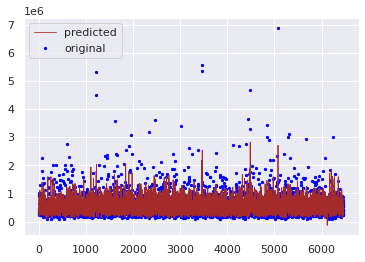

In [475]:
x_ax = range(len(y_pred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred,lw=0.8, color="brown", label="predicted")
plt.legend()
plt.show()

# **d.) Ridge Regression**

In [454]:
#Specifying our regressors and regressands
df.head()

#Regressors
X= df.drop('price', axis=1)

#Regressand
y=df['price']

In [455]:
#We leverage SKLearn Library to split our data into training and test

from sklearn.model_selection import train_test_split

#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [456]:
#We need to standardize our data to enable comparability
#To do this we leverage SK Learn 

from sklearn.preprocessing import StandardScaler

#Instantiaitng Our Scaler

scaler = StandardScaler()

#Fitting X_train to the scaler

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [457]:
#Transforming Our Data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [458]:
#Checking values in X_train
X_train[0]

array([-0.41276515, -0.15551826, -0.64863118, -0.18286276, -0.92456687,
       -0.08415328, -0.30450631, -0.62547689, -0.56993349, -0.36772219,
       -0.65888021,  0.56728466, -0.20518027, -1.40498048])

In [460]:
#Importing Ridge

from sklearn.linear_model import RidgeCV

from sklearn.metrics import SCORERS

In [461]:
ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5, scoring='neg_mean_absolute_error')

In [462]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring='neg_mean_absolute_error',
        store_cv_values=False)

In [463]:
ridge_cv.alpha_

10.0

In [412]:
y_pred = ridge_cv.predict(X_test)

In [413]:
mea_ridgecv= mean_absolute_error(y_test, y_pred)

In [414]:
rmse_ridgecv = np.sqrt(mean_squared_error(y_test, y_pred))

In [415]:
mea_ridgecv

140695.83633841755

In [416]:
rmse_ridgecv

222789.08525874125

# **e.) Elasticnet Regression**

In [480]:
#Importing Elasticnet class from SkLearn
#We use Elasticnet CV to automatically carry out Crossvalidation

from sklearn.linear_model import ElasticNetCV


In [481]:
#Data Preparation
df.head()
X= df.drop('price', axis=1)
y=df['price']

In [483]:
#Instantiating Our Model

el_model =ElasticNetCV(l1_ratio=[.1, .5, .7,
    .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=100000)

In [484]:
#Fitting Our Model
el_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [485]:
#Checking Out the L1 ratios tried and the best ratio

el_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [486]:
#Best performing L1 ratio
el_model.l1_ratio_

1.0

In [487]:
#What is the alpha value
el_model.alpha_

1421248.118004661

In [488]:
#Computing Our y_predictions

y_pred =el_model.predict(X_test)

In [491]:
el_mse = mean_squared_error(y_test, y_pred)
el_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [492]:
el_rmse

261945.4665942685

# **8. Conclusion and Recommendations**

**Challenging the Solution**


**Follow-up Questions**

a.) Did we have the right data


b.) Did we ask the right question?
